# From Quality control to Clustering for day 11 samples

package loading

In [1]:
library(ggplot2)
library(cowplot)
library(dplyr)
library(scran)
library(biomaRt)
library(tibble)
library(AnnotationHub)
library(patchwork)
library(Seurat)
library(harmony)
library(magrittr)
library(SeuratWrappers)
library(scuttle)
library(gprofiler2)
library(ComplexHeatmap)
library(pheatmap)
library(viridis)


Attachement du package : ‘dplyr’


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“le package ‘scran’ a été compilé avec la version R 4.3.2”
Le chargement a nécessité le package : SingleCellExperiment

Warning message:
“le package ‘SingleCellExperiment’ a été compilé avec la version R 4.3.2”
Le chargement a nécessité le package : SummarizedExperiment

Warning message:
“le package ‘SummarizedExperiment’ a été compilé avec la version R 4.3.2”
Le chargement a nécessité le package : MatrixGenerics

Warning message:
“le package ‘MatrixGenerics’ a été compilé avec la version R 4.3.2”
Le chargement a nécessité le package : matrixStats


Attachement du package : ‘matrixStats’


L'objet suivant est masqué depuis ‘package:dplyr’:

    count



Attachement du package : ‘MatrixGenerics’


Les objets suivants sont masqués depuis ‘package:matrixStats’:

  

Definitions of colors pallet

In [2]:
custom_colors <- list()

colors_dutch <- c(
  '#FFC312','#C4E538','#12CBC4','#FDA7DF','#ED4C67',
  '#F79F1F','#A3CB38','#1289A7','#D980FA','#B53471',
  '#EE5A24','#009432','#0652DD','#9980FA','#833471',
  '#EA2027','#006266','#1B1464','#5758BB','#6F1E51'
)

colors_spanish <- c(
  '#40407a','#706fd3','#f7f1e3','#34ace0','#33d9b2',
  '#2c2c54','#474787','#aaa69d','#227093','#218c74',
  '#ff5252','#ff793f','#d1ccc0','#ffb142','#ffda79',
  '#b33939','#cd6133','#84817a','#cc8e35','#ccae62'
)

custom_colors$discrete <- c(colors_dutch, colors_spanish)

custom_colors$cell_cycle <- setNames(
  c('#45aaf2', '#f1c40f', '#e74c3c', '#7f8c8d'),
  c('G1',      'S',       'G2M',     '-')
)

plot resolution

In [3]:
options(repr.plot.width = 18, repr.plot.height = 17, repr.plot.pointsize = 24)

Loading of the cell ranger matrix

In [4]:
bas_t.data<-Read10X("/work/project/fragencode/workspace/plus4pigs/results/run_cellranger_count/esc/bos_taurus_stemcells/outs/filtered_feature_bc_matrix")
multiple.data<-Read10X("/work/project/fragencode/workspace/plus4pigs/results/run_cellranger_count/esc/multiple_stemcells_v2/outs/filtered_feature_bc_matrix")
mice.data<-Read10X("/work/project/fragencode/workspace/plus4pigs/results/run_cellranger_count/esc/PNTD0Solo.out")

In [5]:
bas_t <- CreateSeuratObject(counts = bas_t.data)
multiple <- CreateSeuratObject(counts = multiple.data)
mice <- CreateSeuratObject(counts = mice.data)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


# QC : mitochondrial genes

In [6]:
# Connect to AnnotationHub
ah <- AnnotationHub()

# Access the Ensembl database for organism
ahDb <- query(ah, 
              pattern = c("Homo sapiens", "EnsDb"), 
              ignore.case = TRUE)

In [7]:
id <- ahDb %>%
  mcols() %>%
  rownames() %>%
  tail(n = 1)

In [8]:
edb <- ah[[id]]

loading from cache

require(“ensembldb”)

Warning message:
“le package ‘ensembldb’ a été compilé avec la version R 4.3.2”
Warning message:
“le package ‘GenomicFeatures’ a été compilé avec la version R 4.3.2”
Warning message:
“le package ‘AnnotationDbi’ a été compilé avec la version R 4.3.2”
Warning message:
“le package ‘AnnotationFilter’ a été compilé avec la version R 4.3.2”


Extract gene-level information from database

In [9]:
annotations <- genes(edb, 
                     return.type = "data.frame") 

Select annotations of interest

In [10]:
annotations <- annotations %>%
  dplyr::select(gene_id, gene_name, gene_biotype, seq_name, description, entrezid)

Extract IDs for mitochondrial genes

In [11]:
mt <- annotations %>%
        dplyr::filter(seq_name == "MT")
mt$gene_name <- ifelse(mt$gene_name == '', mt$gene_id, mt$gene_name)
mt_hs <- mt$gene_name

In [12]:
# Access the Ensembl database for organism
ahDb <- query(ah, 
              pattern = c("Sus scrofa", "EnsDb"), 
              ignore.case = TRUE)

In [13]:
id <- ahDb %>%
  mcols() %>%
  rownames() %>%
  tail(n = 1)

In [14]:
edb <- ah[[id]]

loading from cache



Extract gene-level information from database

In [15]:
annotations <- genes(edb, 
                     return.type = "data.frame") 

Select annotations of interest

In [16]:
annotations <- annotations %>%
  dplyr::select(gene_id, gene_name, gene_biotype, seq_name, description, entrezid)

Extract IDs for mitochondrial genes

In [17]:
mt <- annotations %>%
        dplyr::filter(seq_name == "MT")
mt$gene_name <- ifelse(mt$gene_name == '', mt$gene_id, mt$gene_name)
mt_ss <- mt$gene_name

In [18]:
# Access the Ensembl database for organism
ahDb <- query(ah, 
              pattern = c("Bos taurus", "EnsDb"), 
              ignore.case = TRUE)

In [19]:
id <- ahDb %>%
  mcols() %>%
  rownames() %>%
  tail(n = 1)

In [20]:
edb <- ah[[id]]

loading from cache



Extract gene-level information from database

In [21]:
annotations <- genes(edb, 
                     return.type = "data.frame") 

Select annotations of interest

In [22]:
annotations <- annotations %>%
  dplyr::select(gene_id, gene_name, gene_biotype, seq_name, description, entrezid)

Extract IDs for mitochondrial genes

In [23]:
mt <- annotations %>%
        dplyr::filter(seq_name == "MT")
mt$gene_name <- ifelse(mt$gene_name == '', mt$gene_id, mt$gene_name)
mt_bt <- mt$gene_name

In [24]:
# Access the Ensembl database for organism
ahDb <- query(ah, 
              pattern = c("Ovis aries", "EnsDb"), 
              ignore.case = TRUE)

In [25]:
id <- ahDb %>%
  mcols() %>%
  rownames() %>%
  tail(n = 1)

In [26]:
edb <- ah[[id]]

loading from cache



Extract gene-level information from database

In [27]:
annotations <- genes(edb, 
                     return.type = "data.frame") 

Select annotations of interest

In [28]:
annotations <- annotations %>%
  dplyr::select(gene_id, gene_name, gene_biotype, seq_name, description, entrezid)

Extract IDs for mitochondrial genes

In [29]:
mt <- annotations %>%
        dplyr::filter(seq_name == "MT")
mt$gene_name <- ifelse(mt$gene_name == '', mt$gene_id, mt$gene_name)
mt_oa <- mt$gene_name

In [30]:
# Access the Ensembl database for organism
ahDb <- query(ah, 
              pattern = c("Mus musculus", "EnsDb"), 
              ignore.case = TRUE)

In [31]:
id <- ahDb %>%
  mcols() %>%
  rownames() %>%
  tail(n = 1)

In [32]:
edb <- ah[[id]]

loading from cache



Extract gene-level information from database

In [33]:
annotations <- genes(edb, 
                     return.type = "data.frame") 

Select annotations of interest

In [34]:
annotations <- annotations %>%
  dplyr::select(gene_id, gene_name, gene_biotype, seq_name, description, entrezid)

Extract IDs for mitochondrial genes

In [35]:
mt <- annotations %>%
        dplyr::filter(seq_name == "MT")
mt$gene_name <- ifelse(mt$gene_name == '', mt$gene_id, mt$gene_name)
mt_ms <- mt$gene_name

Count Mt RNA percentage

In [36]:
counts <- GetAssayData(object = multiple, slot = "counts")
multiple[["percent.mt_ss"]] <- Matrix::colSums(counts[which(rownames(counts) %in% mt_ss),], na.rm = T)/Matrix::colSums(counts, na.rm = T)
multiple[["percent.mt_oa"]] <- Matrix::colSums(counts[which(rownames(counts) %in% mt_oa),], na.rm = T)/Matrix::colSums(counts, na.rm = T)
multiple[["percent.mt_hs"]] <- Matrix::colSums(counts[which(rownames(counts) %in% mt_hs),], na.rm = T)/Matrix::colSums(counts, na.rm = T)
counts <- GetAssayData(object = mice, slot = "counts")
mice[["percent.mt_mm"]] <- Matrix::colSums(counts[which(rownames(counts) %in% mt_ms),], na.rm = T)/Matrix::colSums(counts, na.rm = T)
counts <- GetAssayData(object = bas_t, slot = "counts")
bas_t[["percent.mt_bt"]] <- Matrix::colSums(counts[which(rownames(counts) %in% mt_bt),], na.rm = T)/Matrix::colSums(counts, na.rm = T)

In [37]:
multiple
bas_t

An object of class Seurat 
103752 features across 1997 samples within 1 assay 
Active assay: RNA (103752 features, 0 variable features)

An object of class Seurat 
32347 features across 2490 samples within 1 assay 
Active assay: RNA (32347 features, 0 variable features)

Visualization of the number of transcript, genes and the percentage of mt RNA per cells

Warning message in FetchData.Seurat(object = object, vars = features, slot = slot):
"The following requested variables were not found: percent.mt"


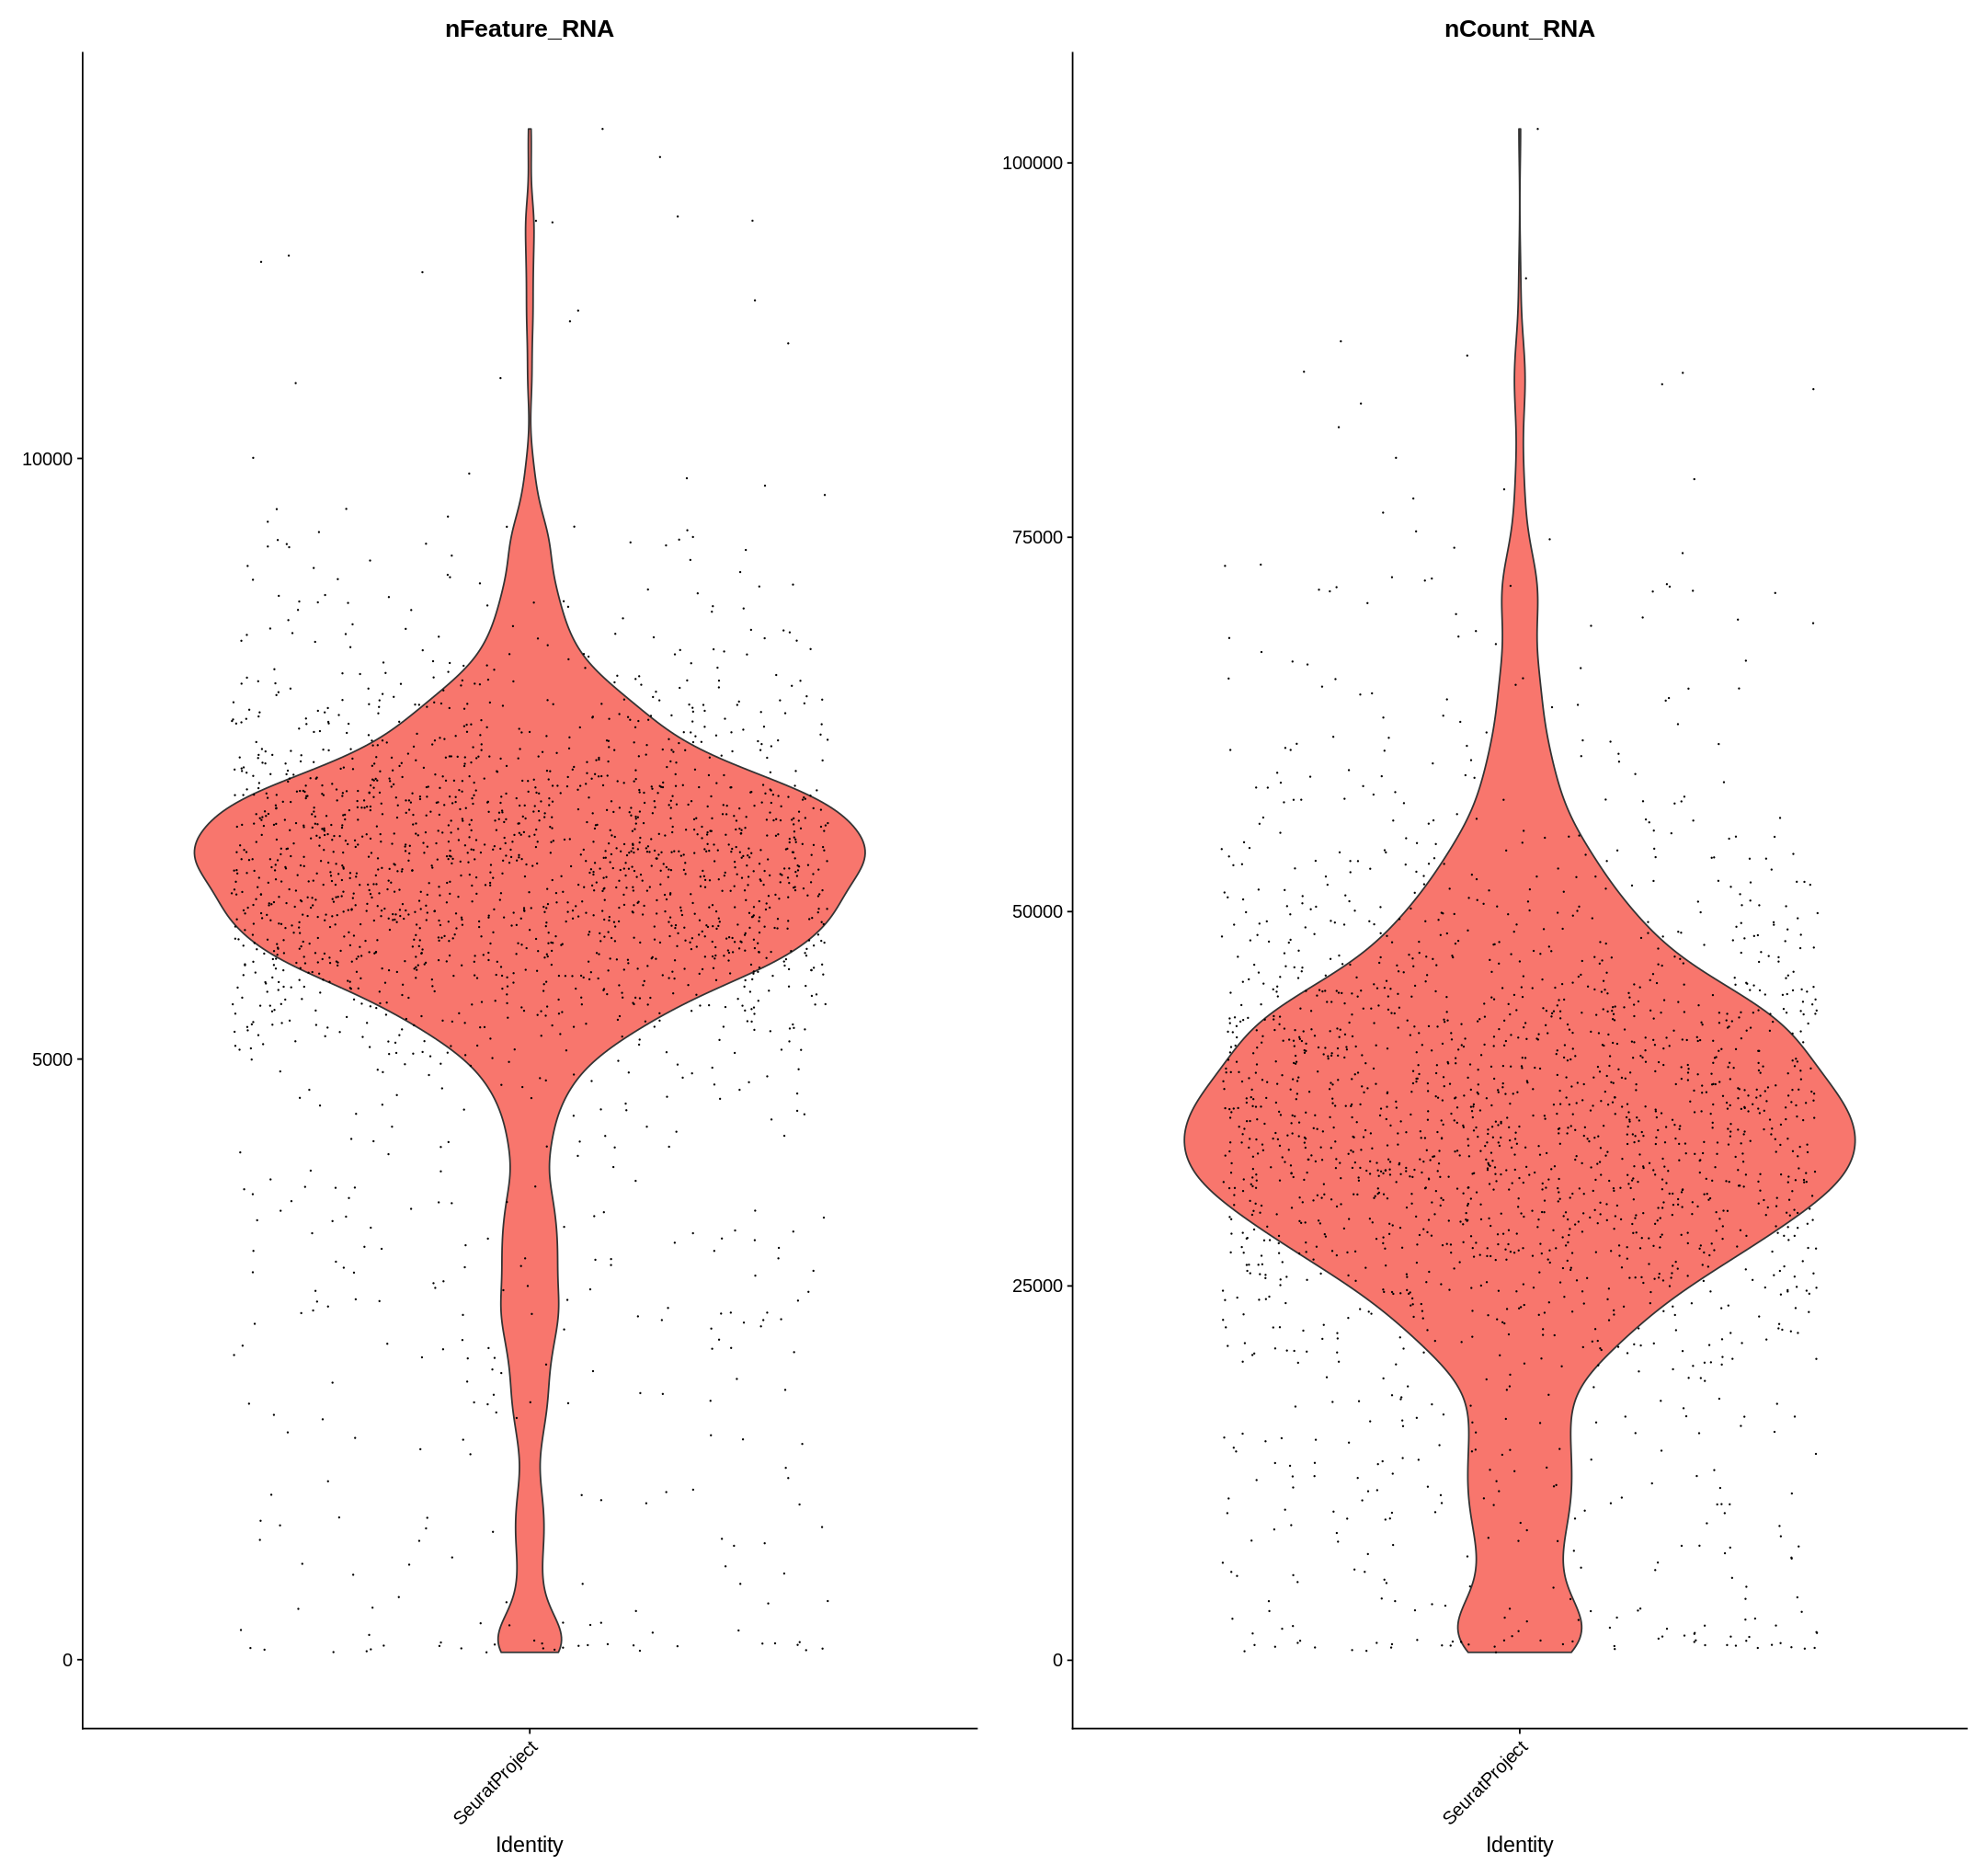

Warning message:
"Removed 160351 rows containing non-finite values (`stat_ydensity()`)."
Warning message:
"Removed 160351 rows containing missing values (`geom_point()`)."


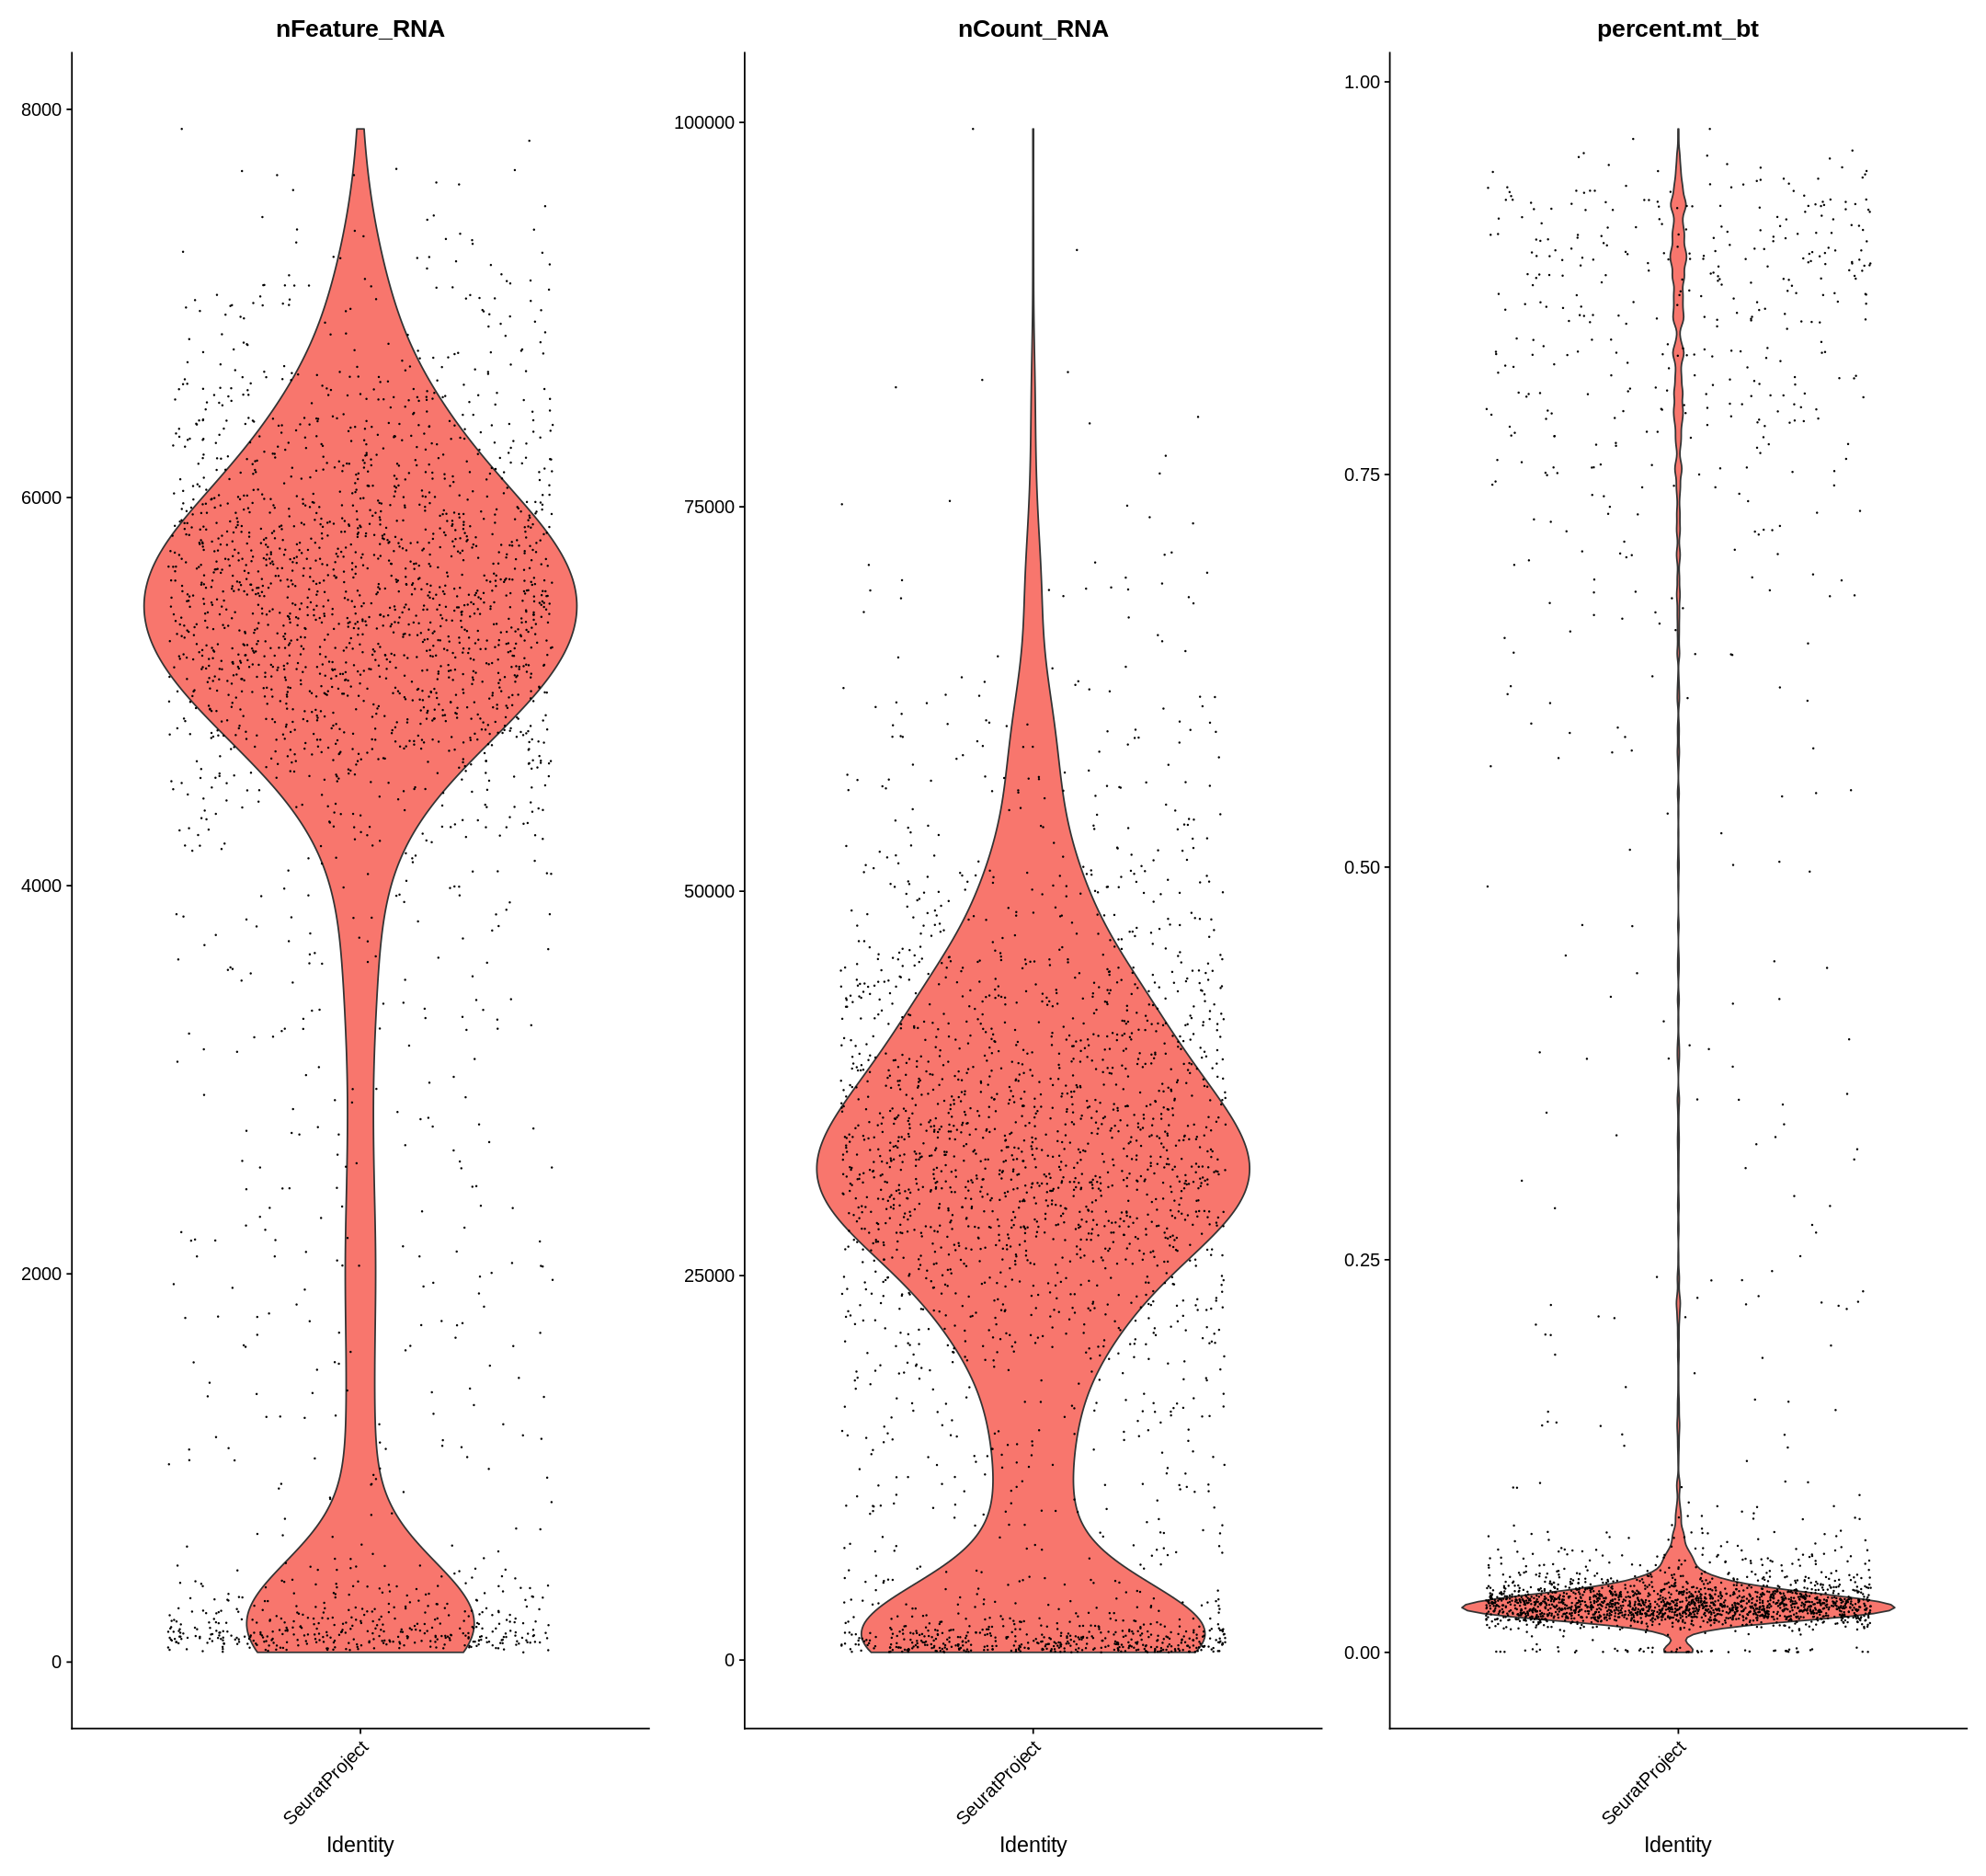

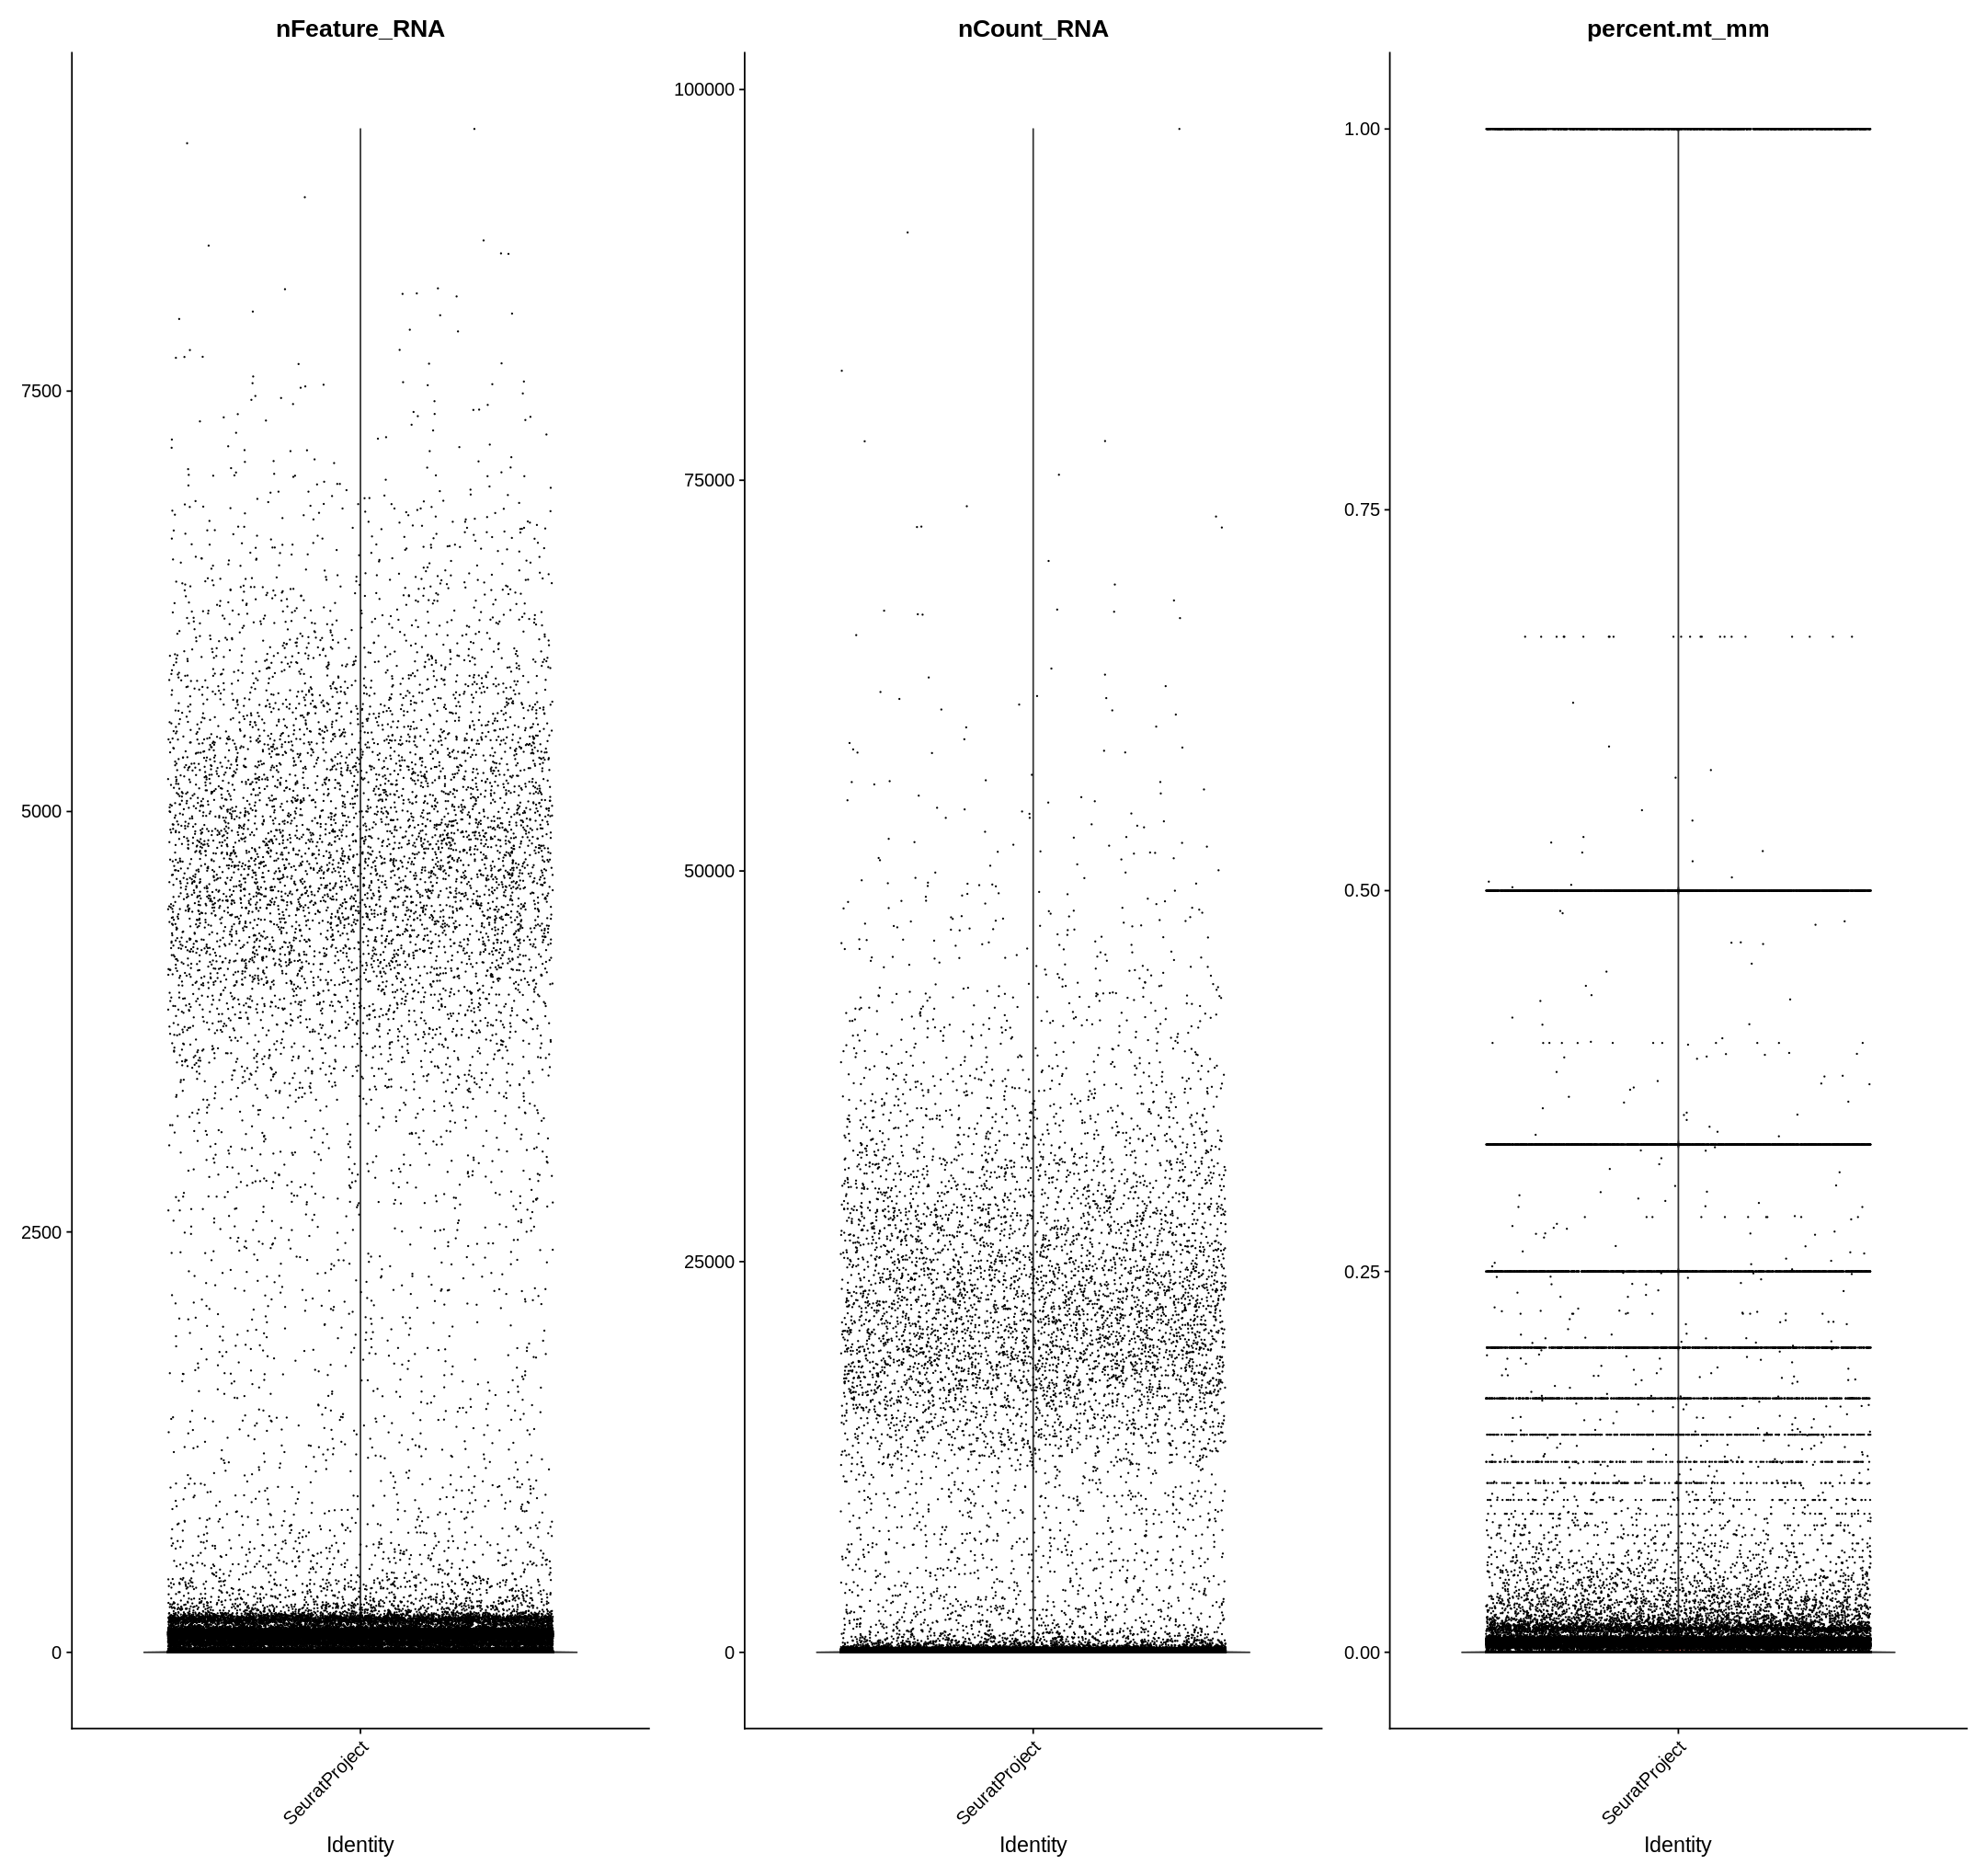

In [38]:
VlnPlot(multiple, features = c("nFeature_RNA","nCount_RNA","percent.mt"),ncol=2)
VlnPlot(bas_t, features = c("nFeature_RNA","nCount_RNA","percent.mt_bt"),ncol=3)
VlnPlot(mice, features = c("nFeature_RNA","nCount_RNA","percent.mt_mm"),ncol=3)

filter the different samples

In [39]:
multiple <- subset(multiple, subset = nFeature_RNA > 300 & nCount_RNA < 75000 & percent.mt_ss < 20 & percent.mt_oa < 20 & percent.mt_hs < 20)

In [40]:
mice <- subset(mice, subset = nFeature_RNA > 300 & nCount_RNA < 55000 & percent.mt_mm < 20)

In [41]:
bas_t <- subset(bas_t, subset = nFeature_RNA > 300 & nCount_RNA < 75000 & percent.mt_bt < 20)

Normalization, selection of varibale feature, scaling, PCA and batch correction

In [42]:
multiple.integrated <- NormalizeData(multiple) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose = FALSE)

Centering and scaling data matrix



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
"Transformation introduced infinite values in continuous x-axis"


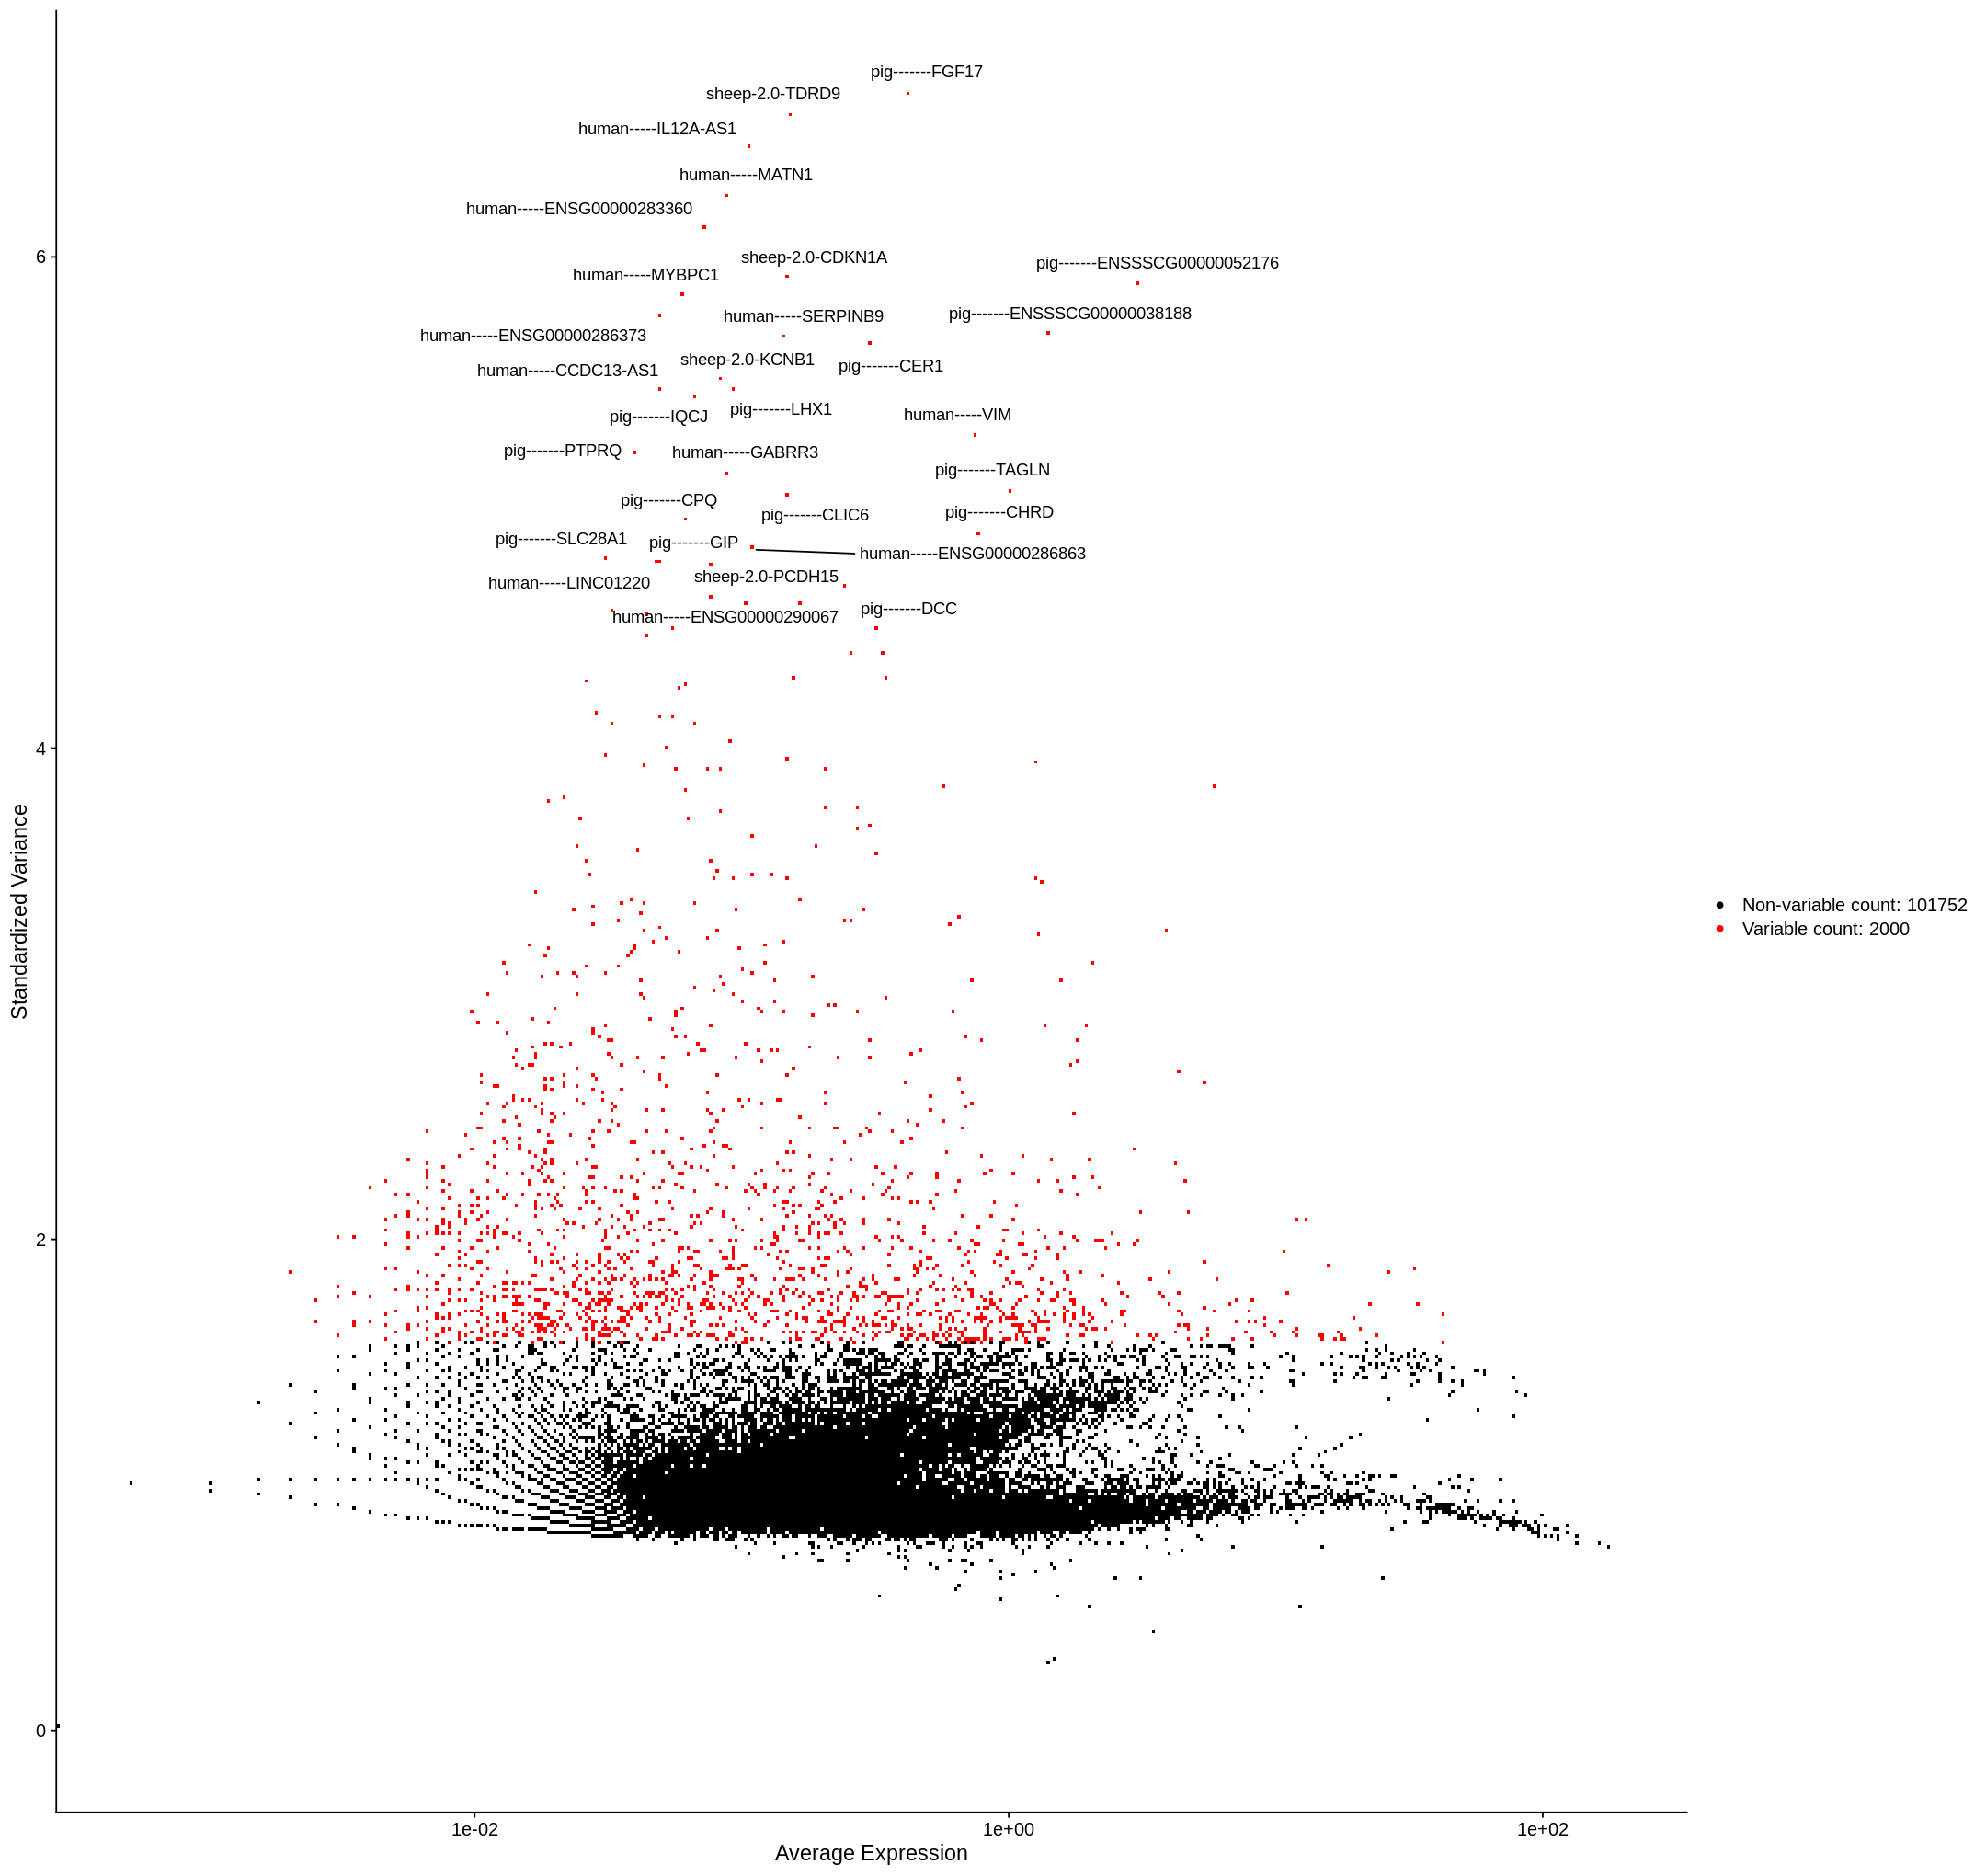

In [43]:
topfeature <- head(VariableFeatures(multiple.integrated), 30)
plotfeature <- VariableFeaturePlot(multiple.integrated)
LabelPoints(plot = plotfeature, points = topfeature, repel = TRUE, xnudge = 0, ynudge = 0, max.overlaps = 30)

# Visualization fo the different principal composant

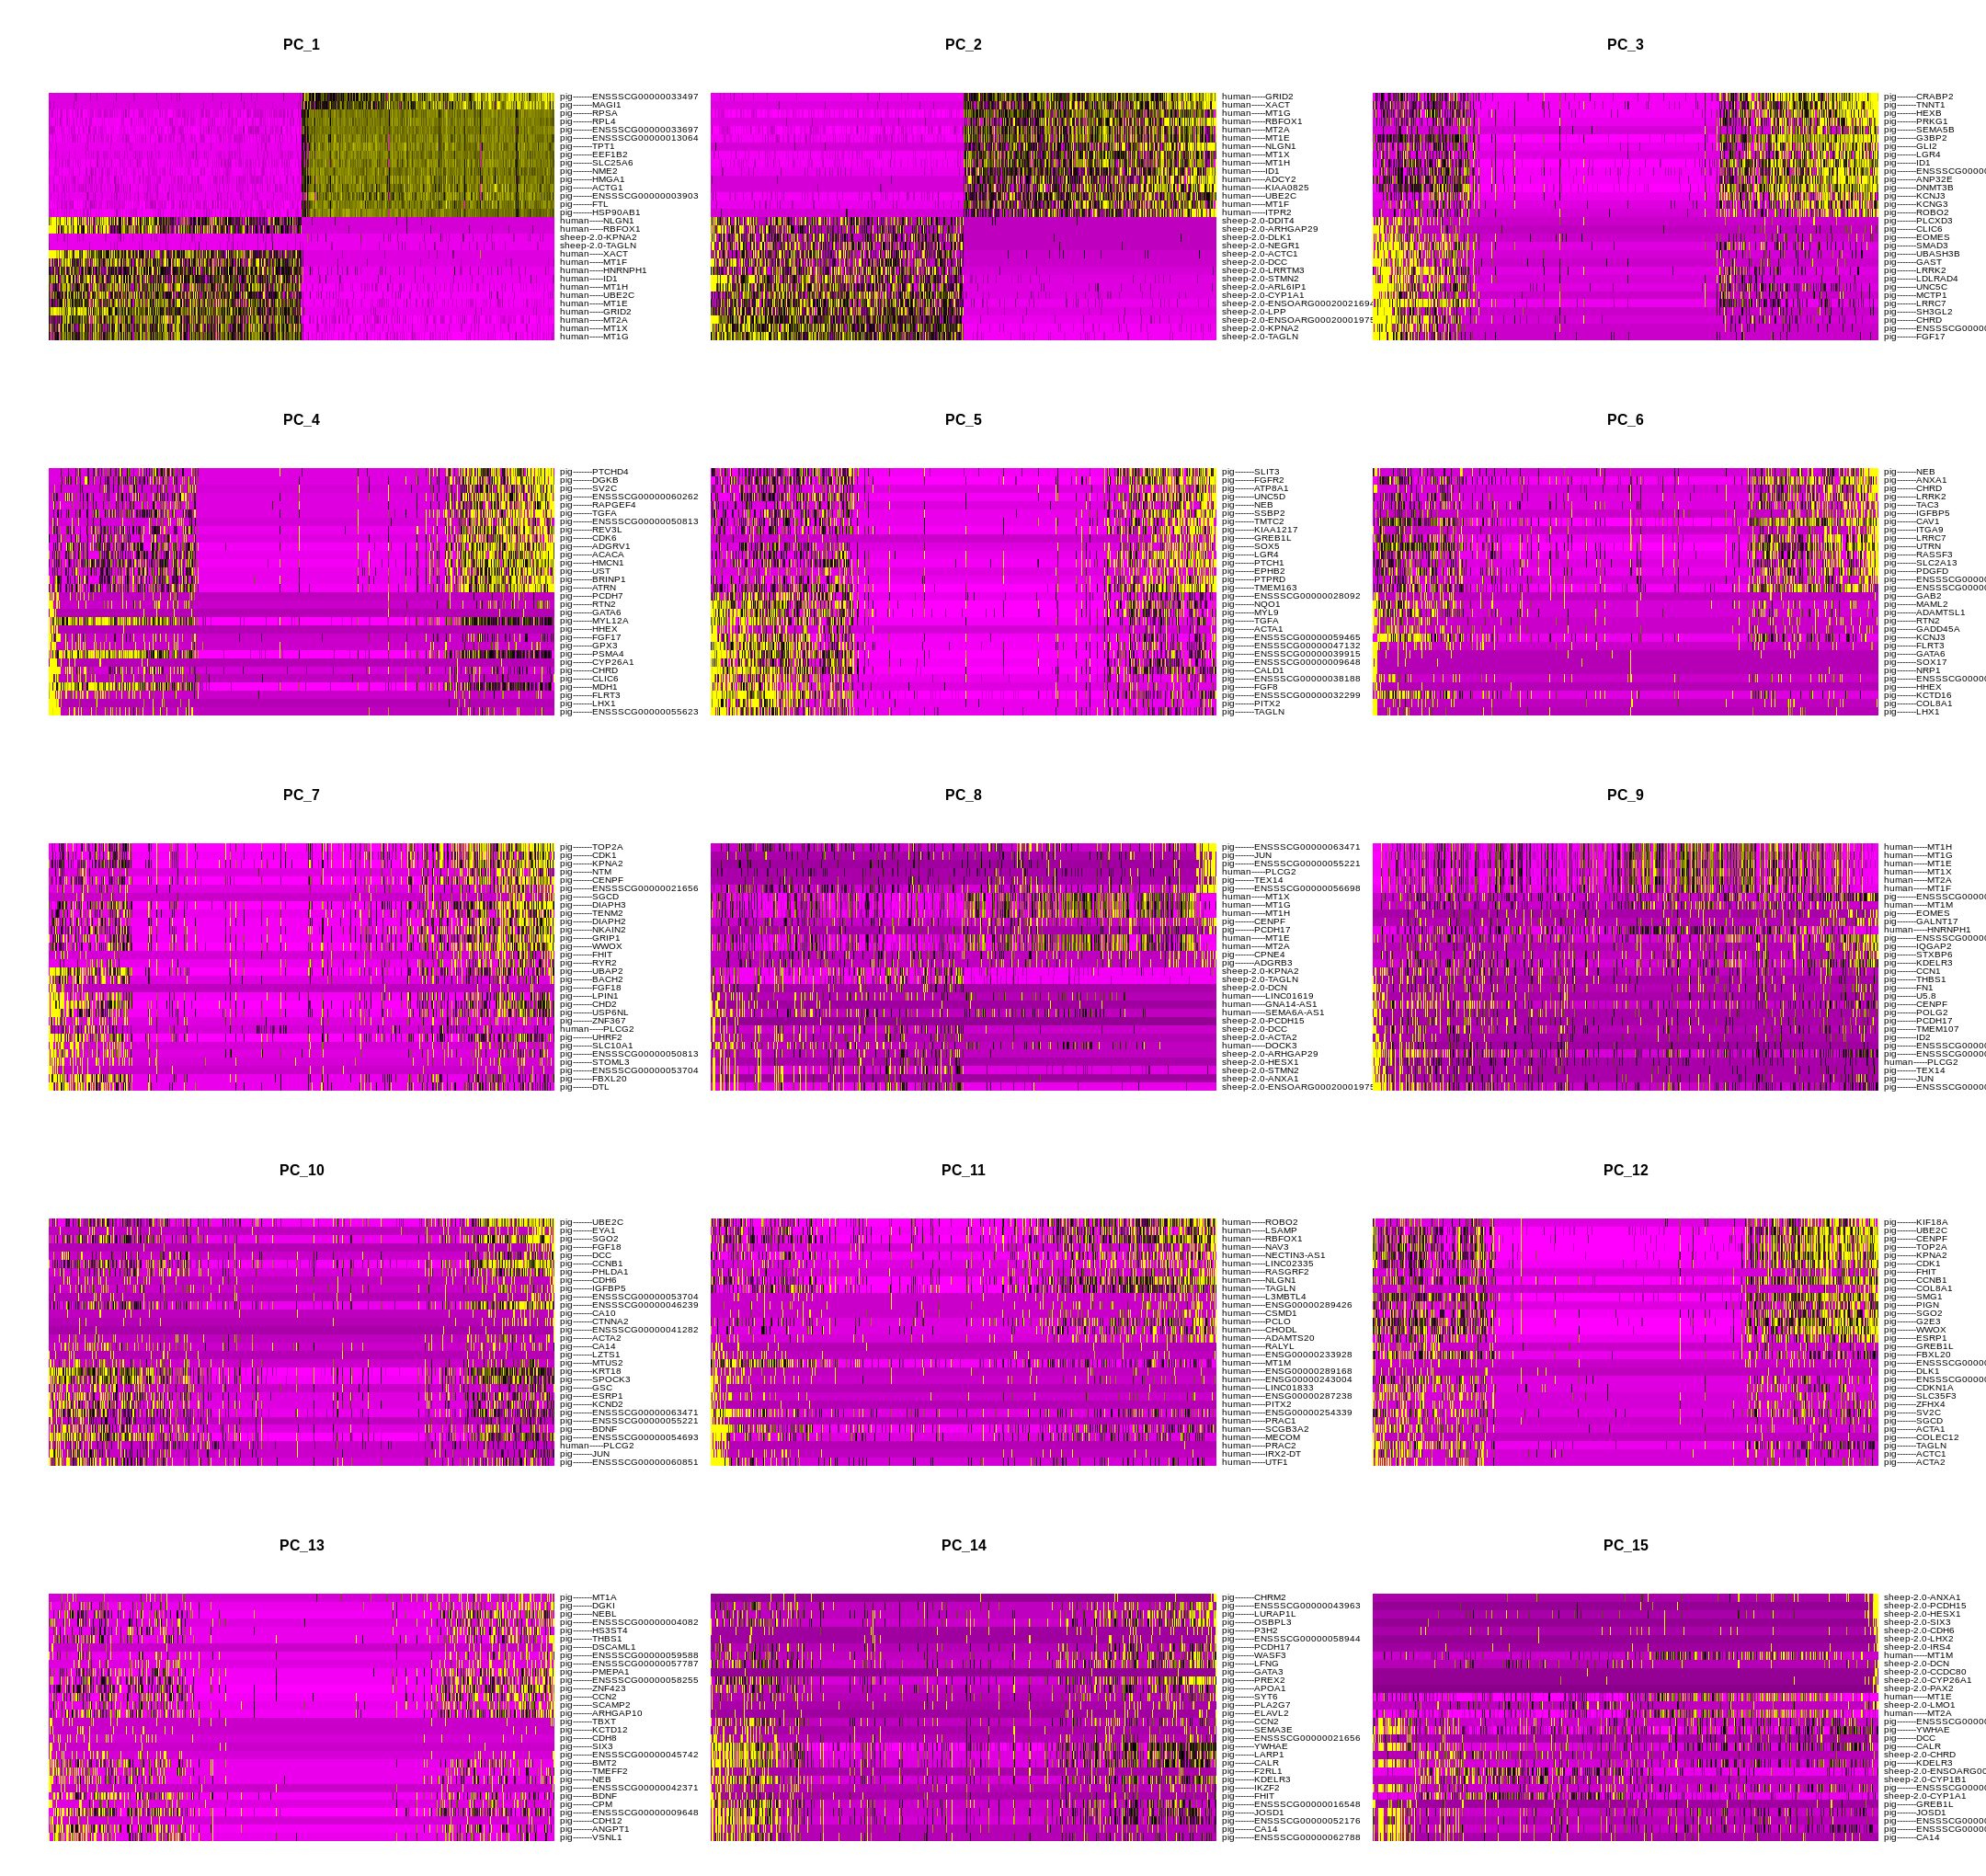

In [45]:
DimHeatmap(multiple.integrated, dims = 1:15, cells = 1000, balanced = TRUE)

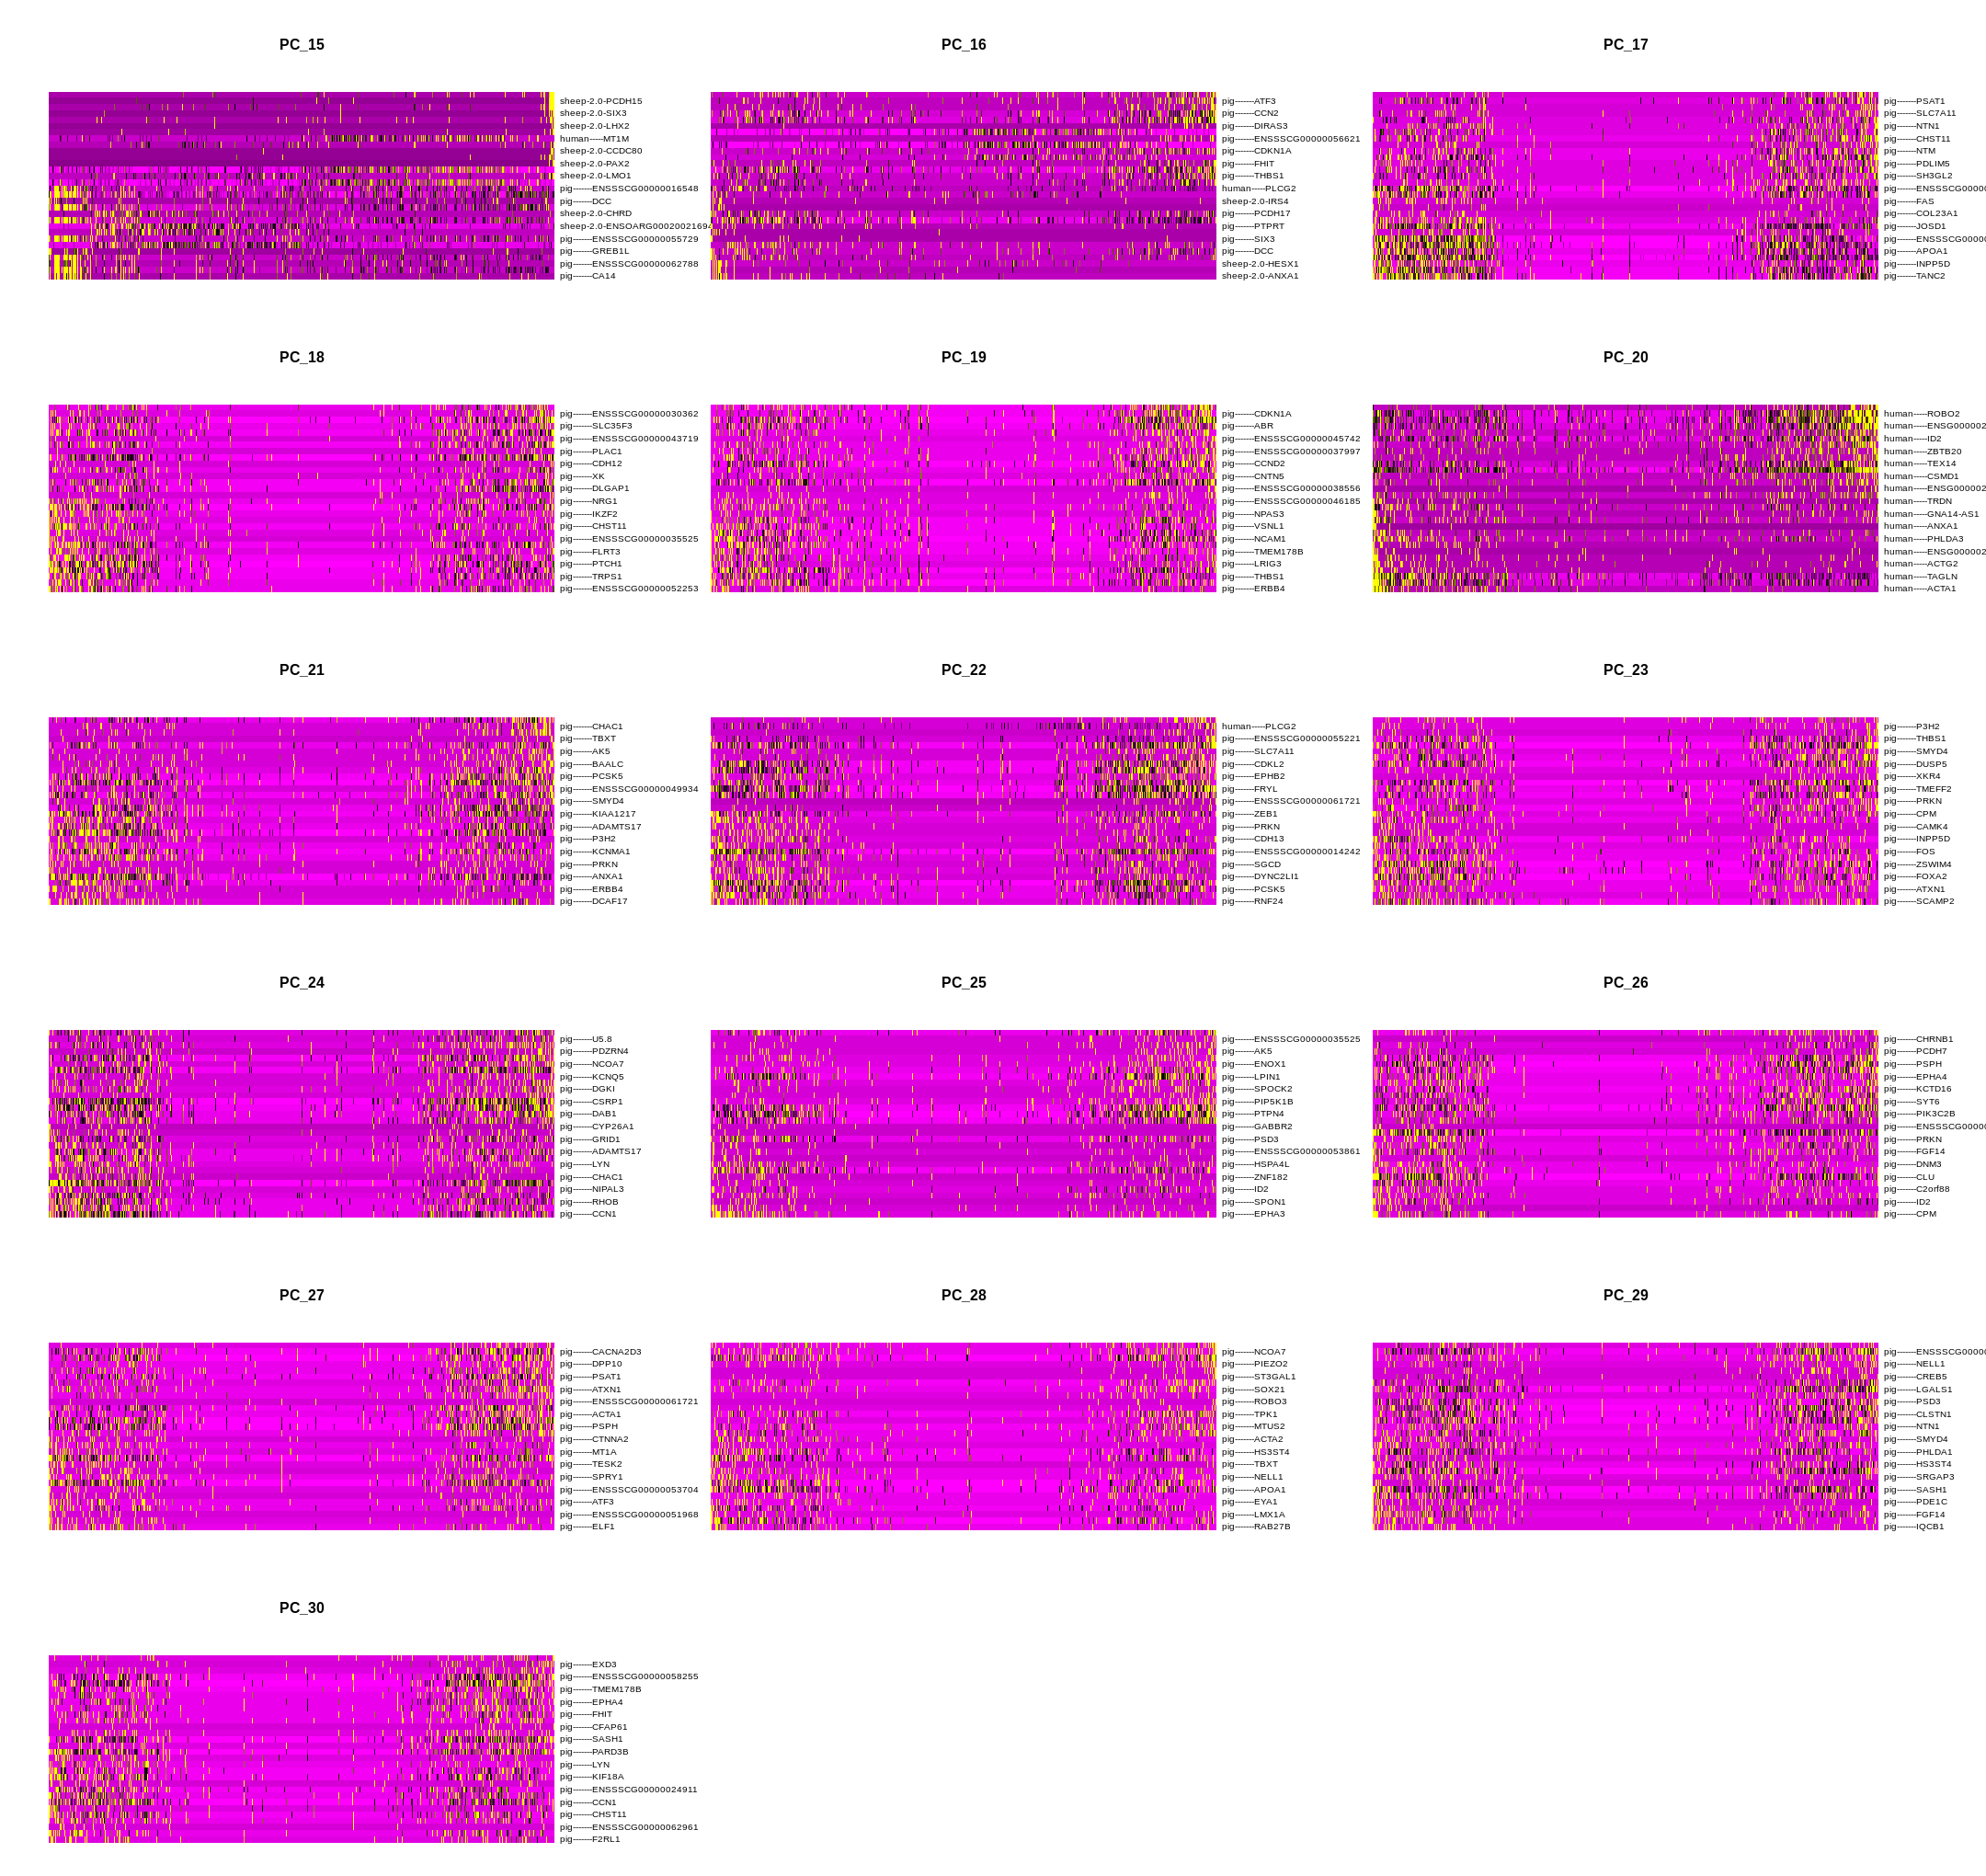

In [46]:
DimHeatmap(multiple.integrated, dims = 15:30, cells = 1000, balanced = TRUE)

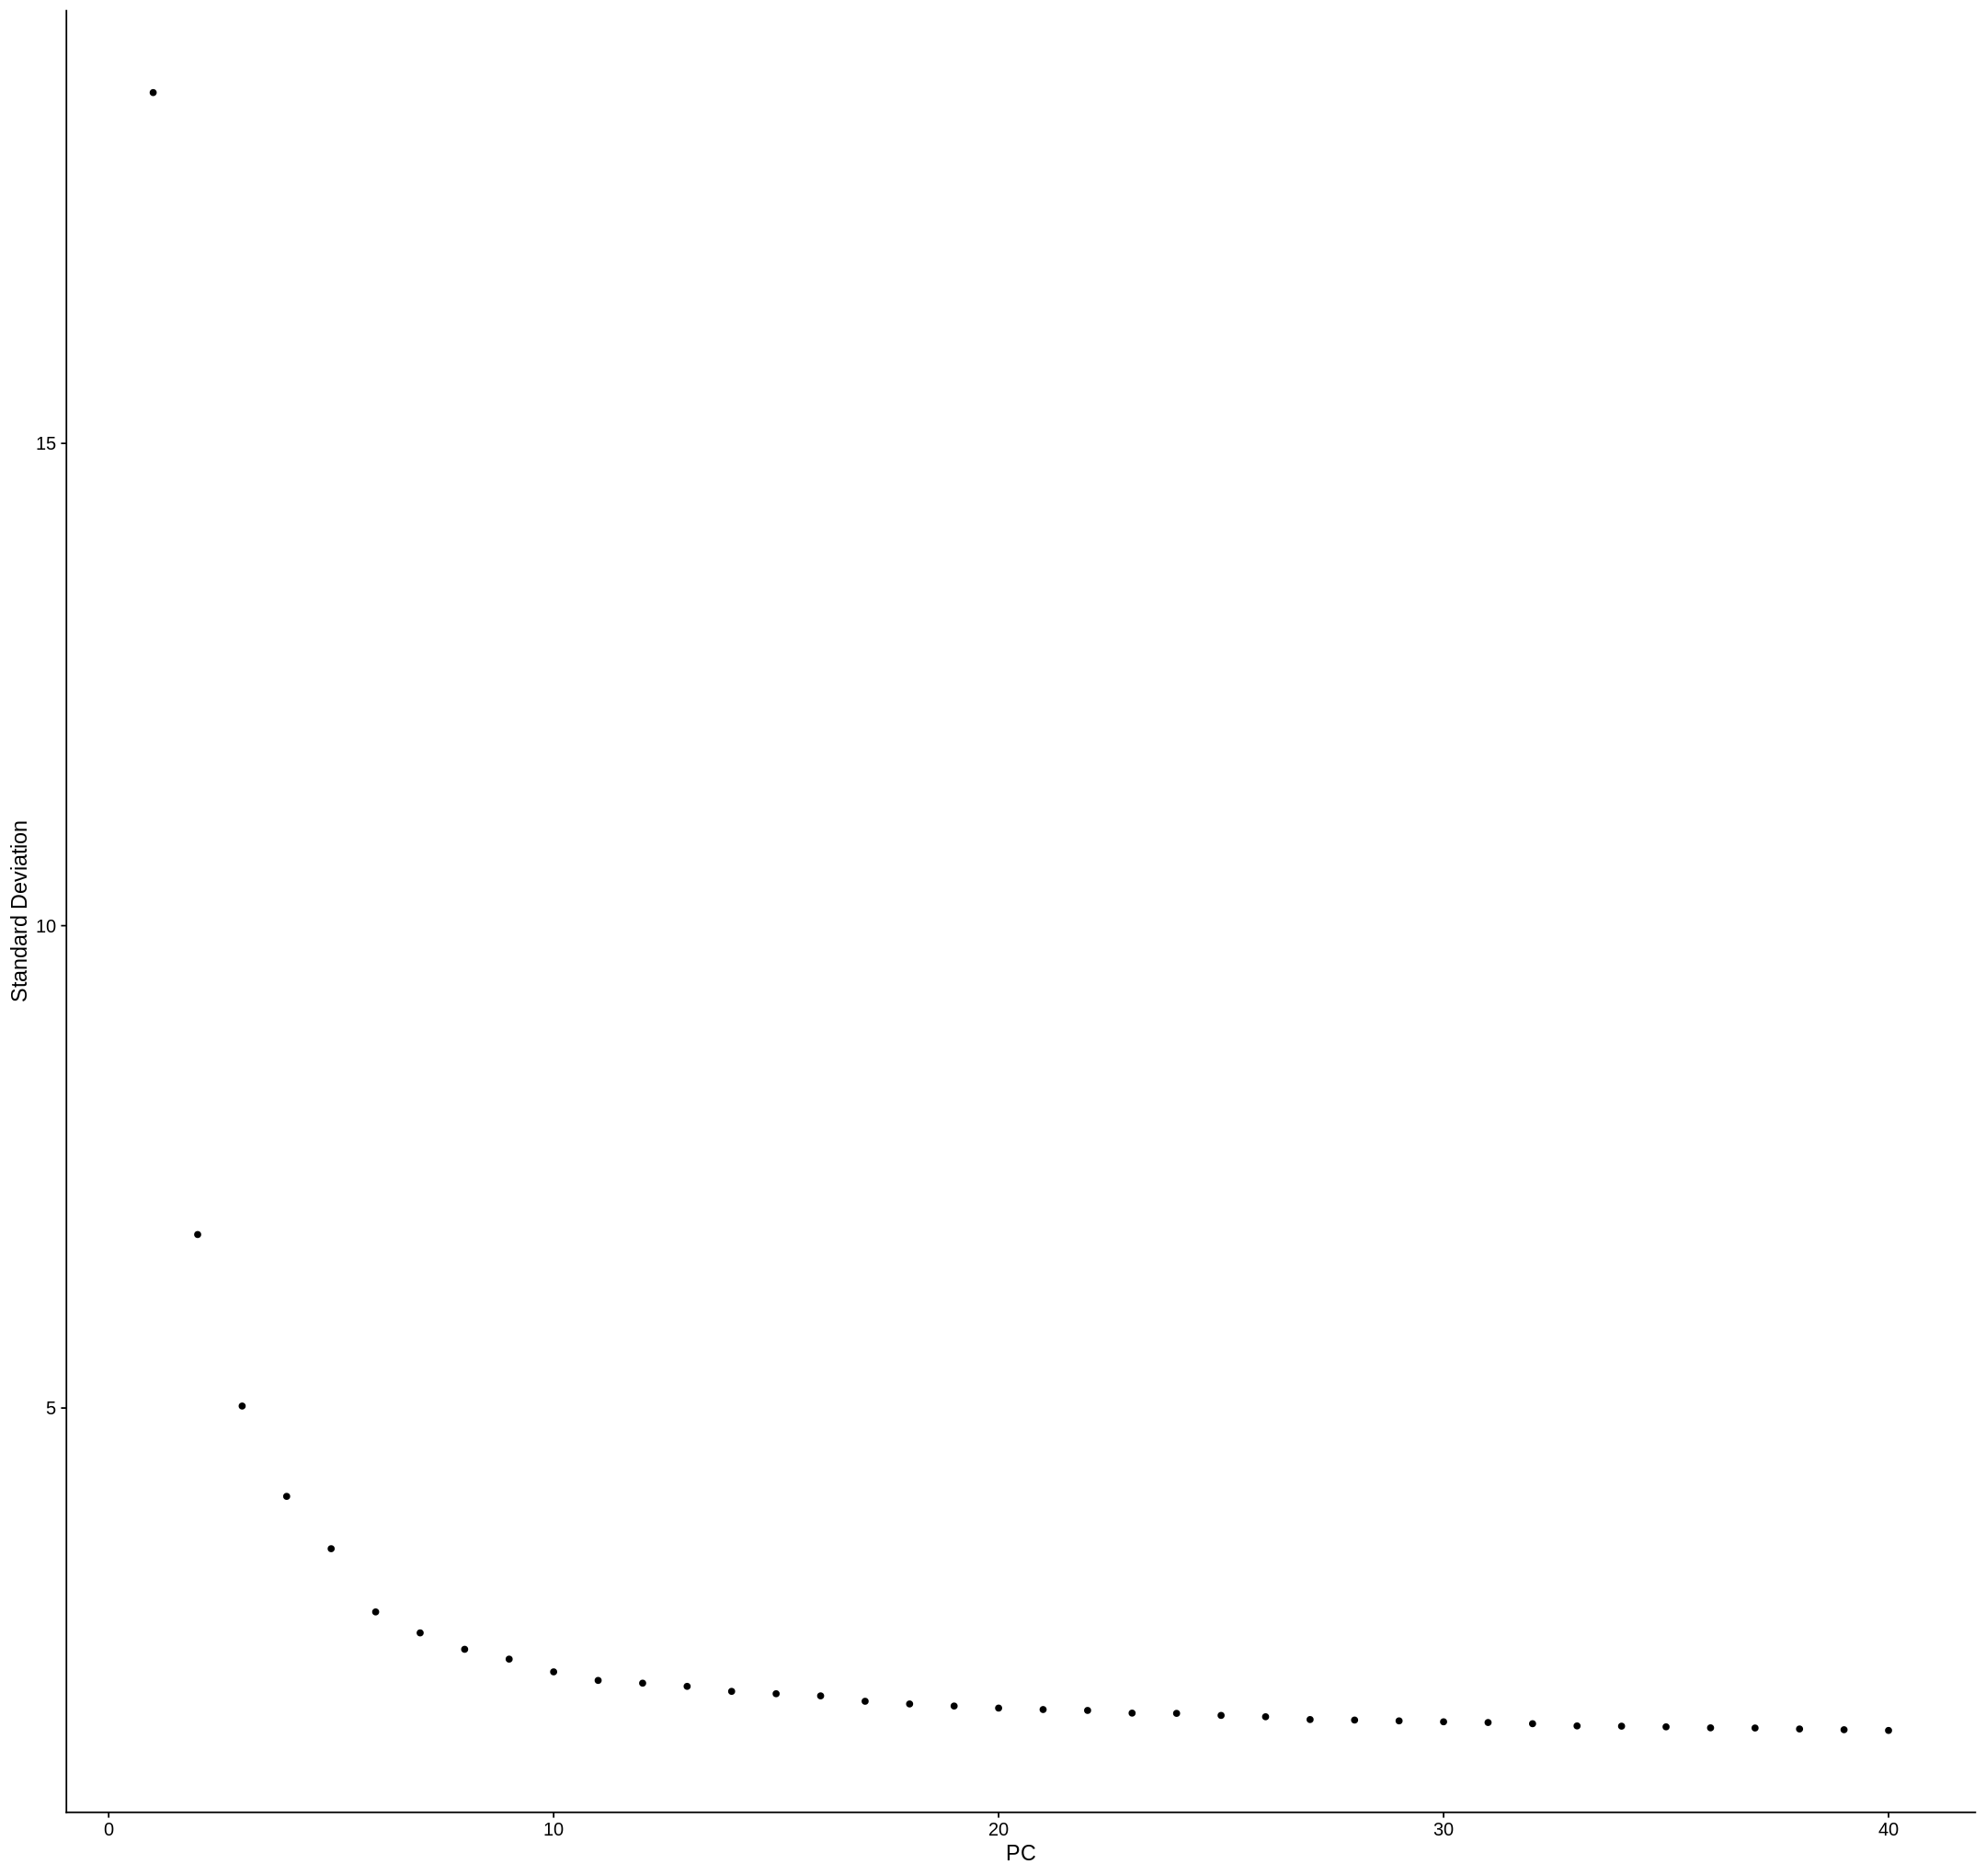

In [47]:
ElbowPlot(multiple.integrated, ndims = 40)

# Vizualization and clustering

In [48]:
multiple.integrated <- RunUMAP(multiple.integrated, dims = 1:13)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
14:34:11 UMAP embedding parameters a = 0.9922 b = 1.112

14:34:11 Read 1947 rows and found 13 numeric columns

14:34:11 Using Annoy for neighbor search, n_neighbors = 30

14:34:11 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:34:11 Writing NN index file to temp file /tmp/RtmpTHEdXS/file3c1b4e4c1c9a8f

14:34:11 Searching Annoy index using 1 thread, search_k = 3000

14:34:12 Annoy recall = 100%

14:34:13 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

In [49]:
multiple.integrated <- FindNeighbors(multiple.integrated, dims = 1:13)

Computing nearest neighbor graph

Computing SNN



In [50]:
multiple.integrated <- FindClusters(multiple.integrated, resolution = 0.05)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1947
Number of edges: 60274

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9822
Number of communities: 3
Elapsed time: 0 seconds


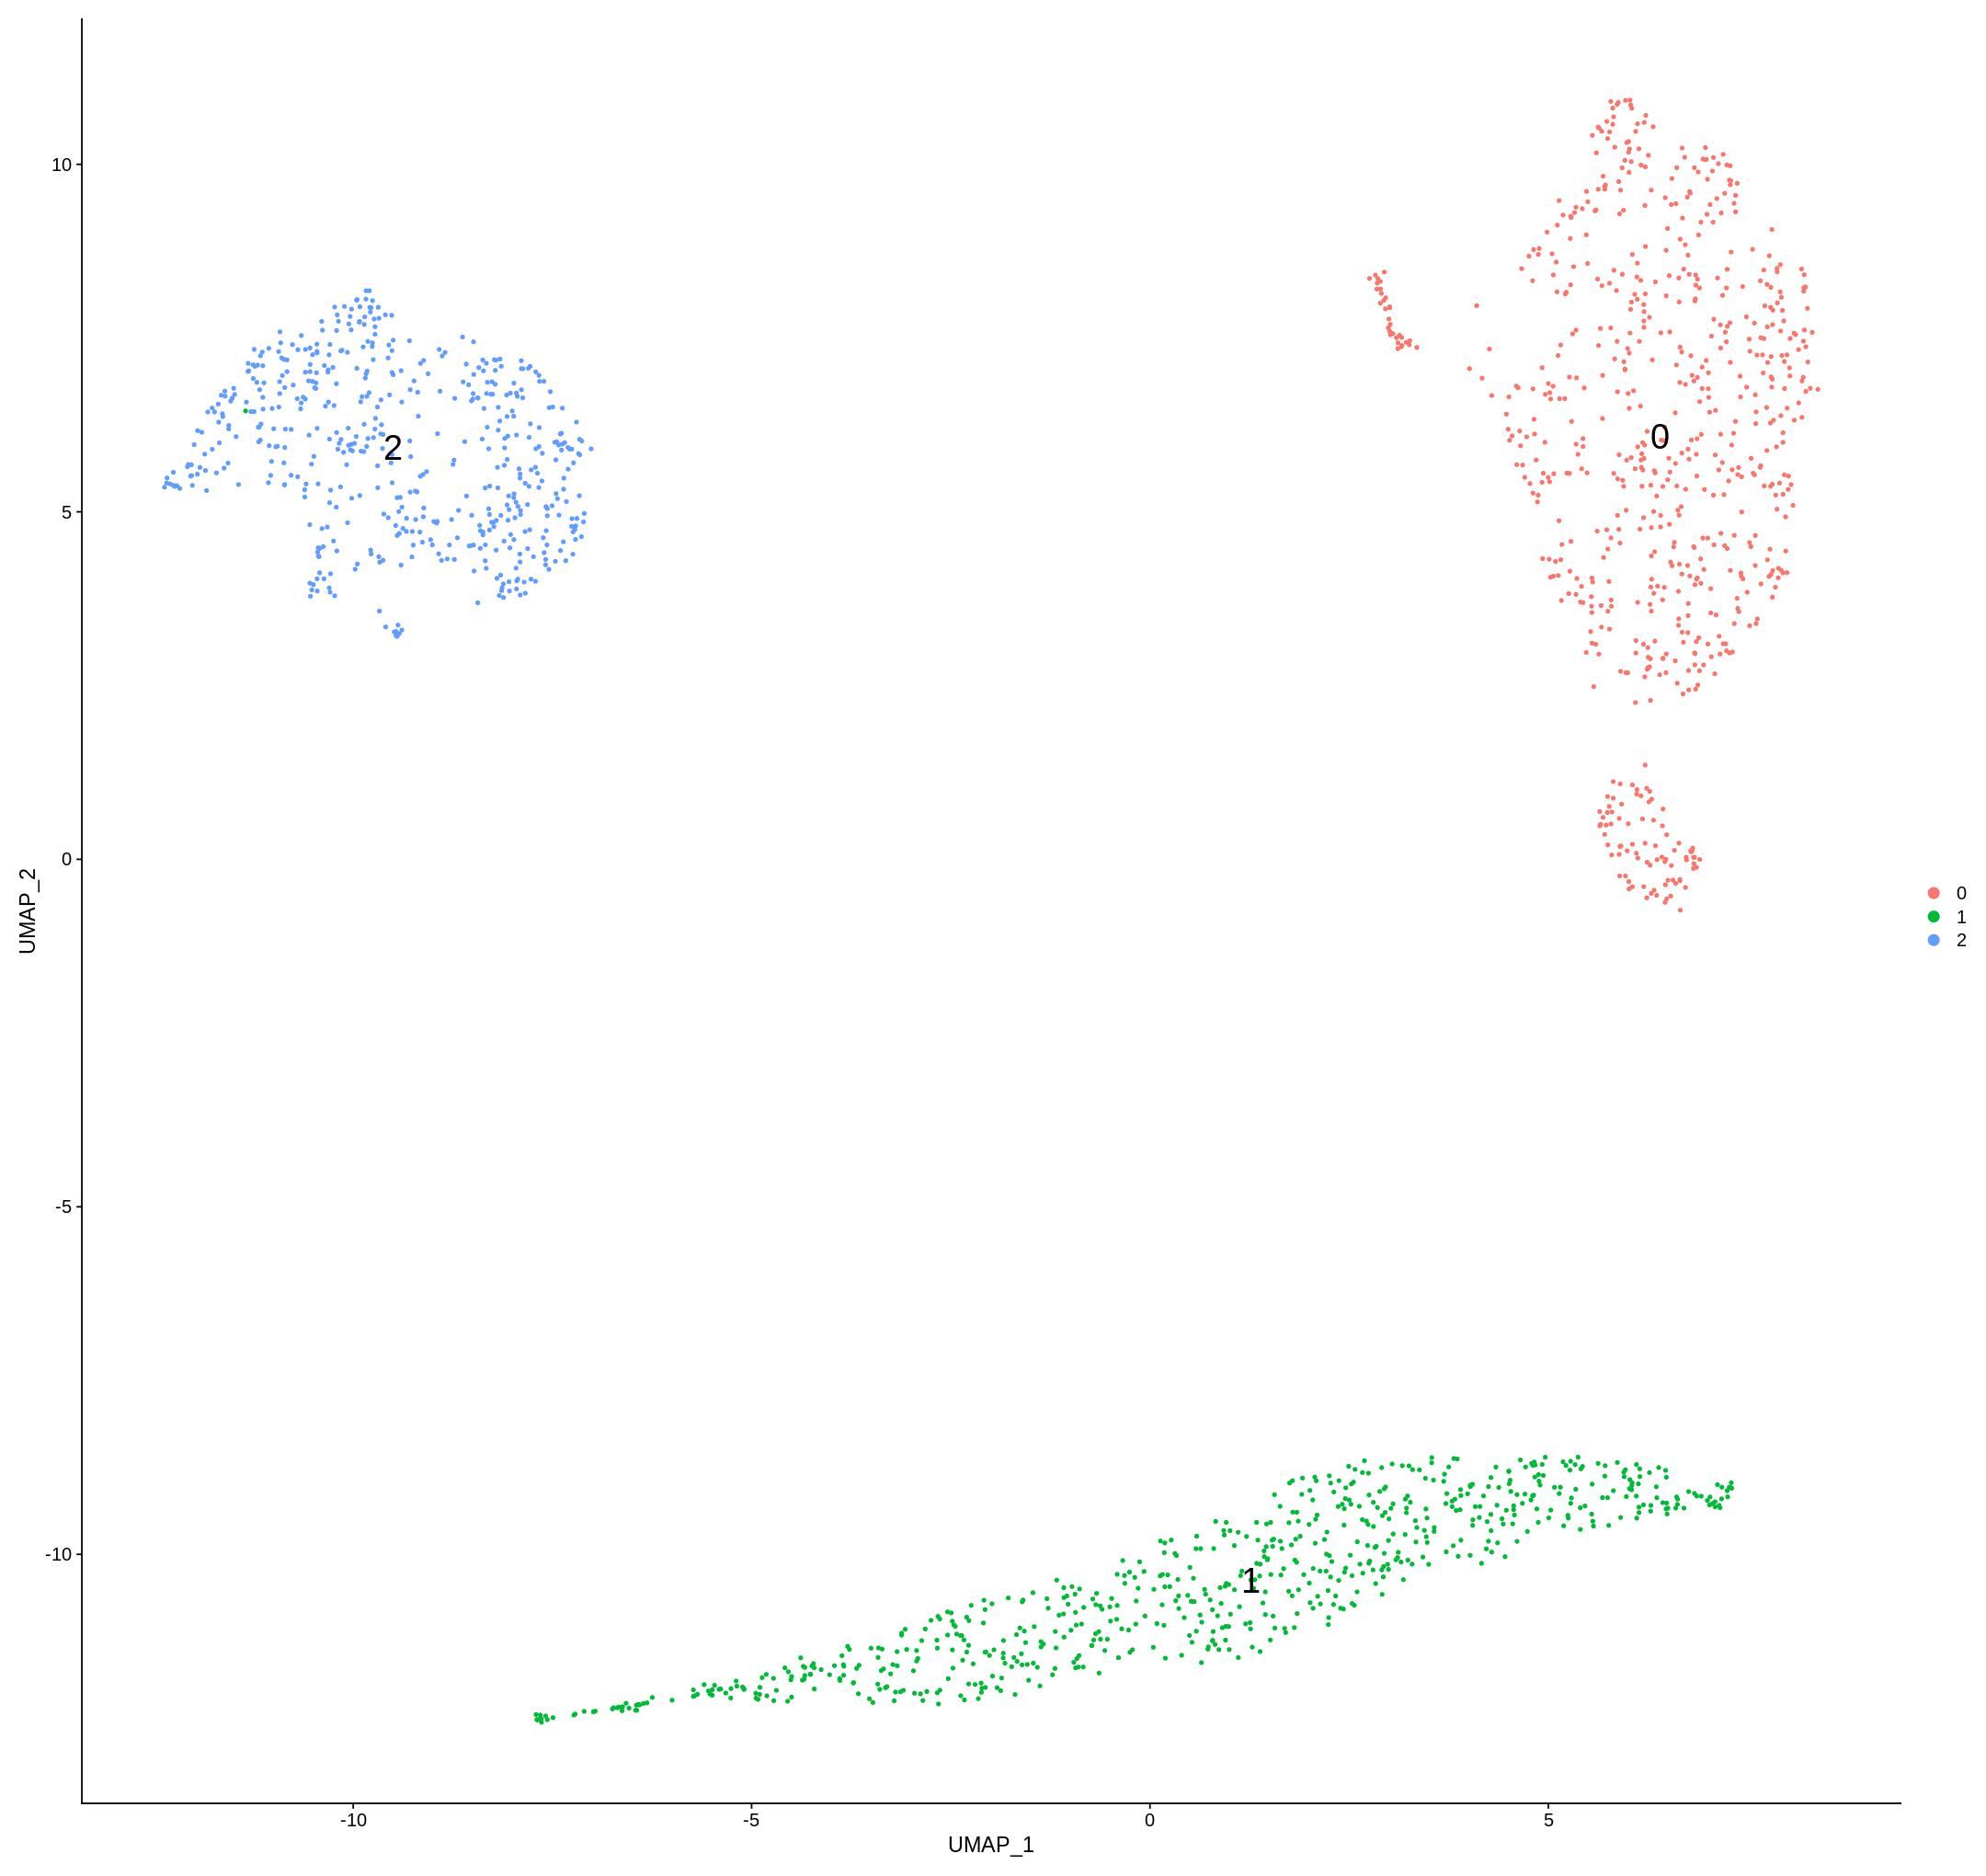

In [51]:
DimPlot(multiple.integrated, reduction = "umap", label = TRUE, label.size = 8)

In [52]:
multiple.integrated[["percent.human"]] <- PercentageFeatureSet(multiple.integrated, pattern = "^human-")
multiple.integrated[["percent.pig"]] <- PercentageFeatureSet(multiple.integrated, pattern = "^pig-")
multiple.integrated[["percent.sheep"]] <- PercentageFeatureSet(multiple.integrated, pattern = "^sheep-")

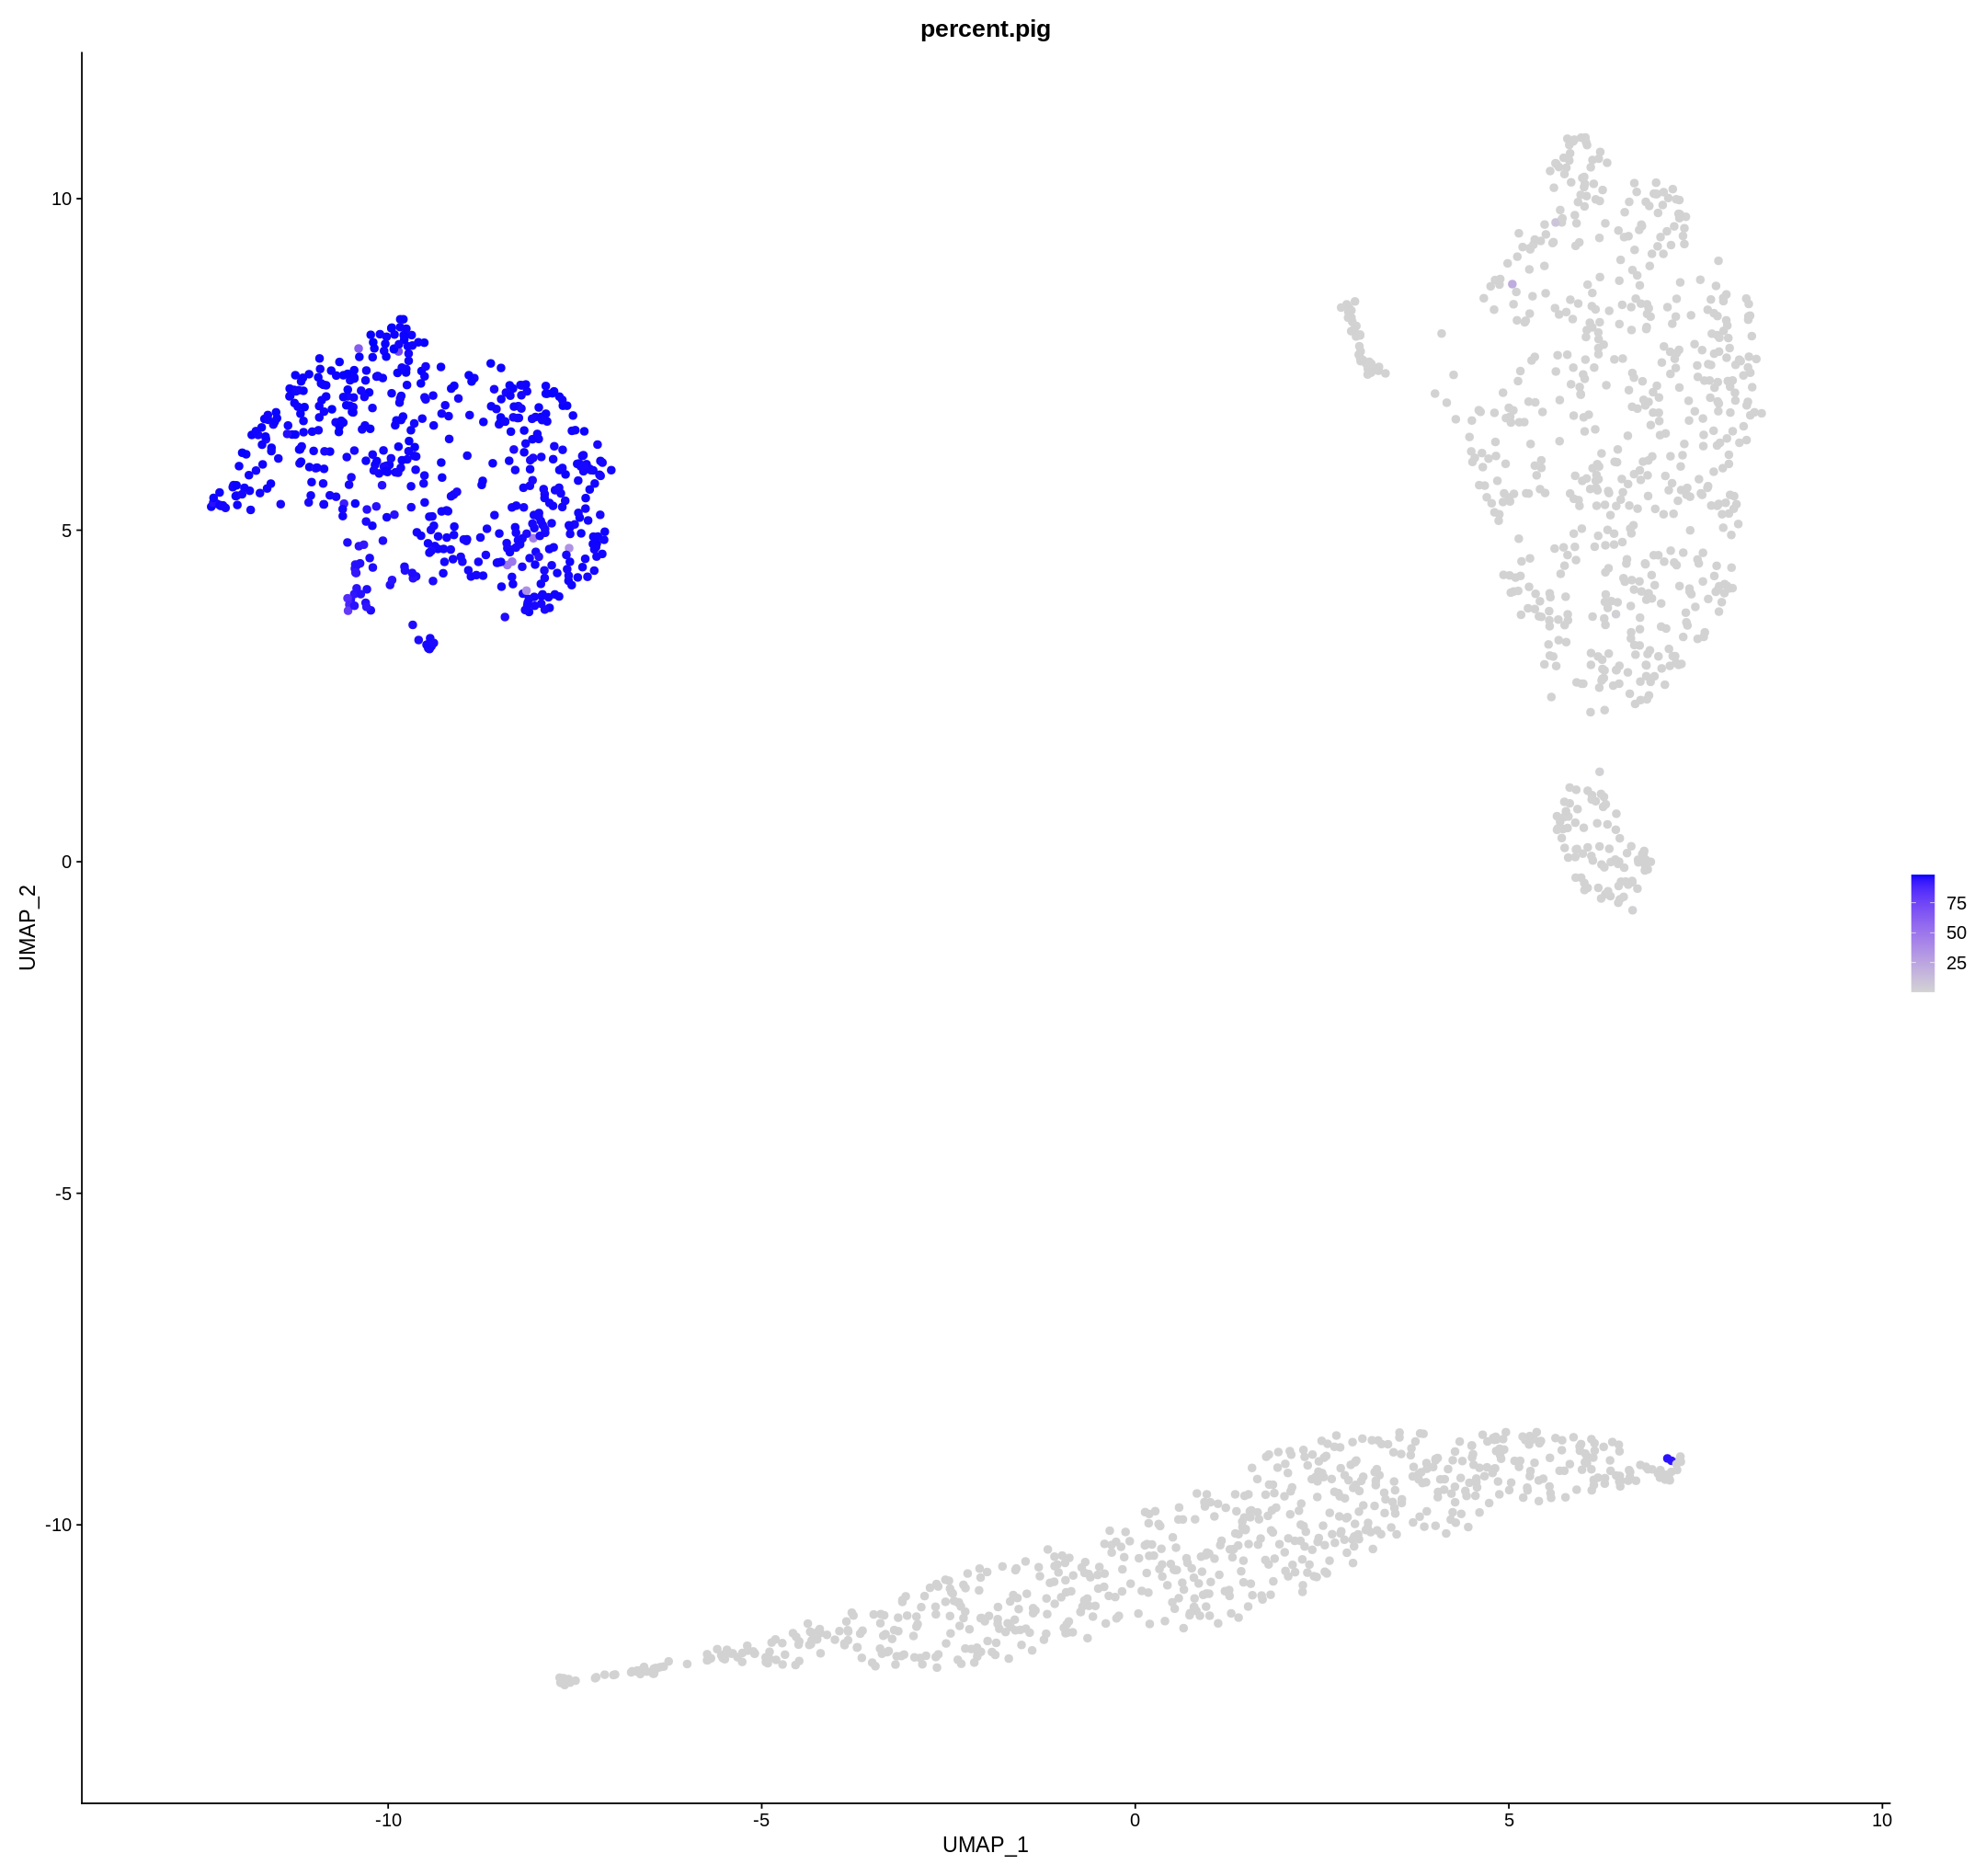

In [53]:
FeaturePlot(multiple.integrated, pt.size = 2, features = "percent.pig")

In [54]:
multiple.integrated@meta.data$species <- "null"

In [55]:
multiple.integrated@meta.data[which(multiple.integrated@meta.data$seurat_clusters == "1"),]$species <- "Sheep"
multiple.integrated@meta.data[which(multiple.integrated@meta.data$seurat_clusters == "0"),]$species <- "Human"
multiple.integrated@meta.data[which(multiple.integrated@meta.data$seurat_clusters == "2"),]$species <- "Pig"

In [56]:
human_gene_list <- grep("human-", rownames(multiple.integrated@assays$RNA@counts))
pig_gene_list <- grep("pig-", rownames(multiple.integrated@assays$RNA@counts))
sheep_gene_list <- grep("sheep-", rownames(multiple.integrated@assays$RNA@counts))

Split by species

In [57]:
Idents(multiple.integrated) <- "species"
embryo_pig <- subset(x = multiple.integrated, idents = "Pig")
embryo_human <- subset(x = multiple.integrated, idents = "Human")
embryo_sheep <- subset(x = multiple.integrated, idents = "Sheep")

remove species add

In [58]:
embryo_sheep@ assays$ RNA@ counts <- embryo_sheep@ assays$ RNA@ counts[sheep_gene_list,]
rownames(embryo_sheep@ assays$ RNA@ counts) <- gsub("sheep-2.0-", "", rownames(embryo_sheep@ assays$ RNA@ counts))

In [59]:
embryo_human@ assays$ RNA@ counts <- embryo_human@ assays$ RNA@ counts[human_gene_list,]

In [60]:
rownames(embryo_human@ assays$ RNA@ counts) <- gsub("human-----", "", rownames(embryo_human@ assays$ RNA@ counts))

In [61]:
embryo_pig@ assays$ RNA@ counts <- embryo_pig@ assays$ RNA@ counts[pig_gene_list,]

In [62]:
rownames(embryo_pig@ assays$ RNA@ counts) <- gsub("pig-------", "", rownames(embryo_pig@ assays$ RNA@ counts))

load other assets

In [63]:
human_stemcells <- readRDS("/home/adufour/work/rds_storage/omics/stemcell_seurat_human.rds")

In [64]:
human_stemcells_wnt <- readRDS("/home/adufour/work/rds_storage/omics/stemcell_seurat_human_wnt.rds")

In [65]:
seuratObj <- readRDS("/home/adufour/work/rds_storage/omics/stemcell_seurat_obj_ter.rds")

recreate seurat obj

In [66]:
embryo_human_matrix <- CreateSeuratObject(counts = embryo_human@ assays$ RNA@ counts)
embryo_sheep_matrix <- CreateSeuratObject(counts = embryo_sheep@ assays$ RNA@ counts)
embryo_pig_matrix <- CreateSeuratObject(counts = embryo_pig@ assays$ RNA@ counts)

In [67]:
embryo_human_matrix$species <- embryo_human@meta.data$species
embryo_sheep_matrix$species <- embryo_sheep@meta.data$species
embryo_pig_matrix$species <- embryo_pig@meta.data$species

merge species

In [68]:
humans_stemcells <- merge(x = human_stemcells, y = c(embryo_human_matrix, human_stemcells_wnt))

set multiomics colnames

In [69]:
seuratObj@meta.data <- seuratObj@meta.data[,c("Time", "Cluster")]

In [70]:
colnames(seuratObj@meta.data) <- c("Time", "species")

In [71]:
pig_cells <- merge(x = seuratObj, y = embryo_pig_matrix)

gprofiler pig

In [72]:
gene_converted <- gconvert(query = rownames(pig_cells@ assays$ RNA@ counts), organism = "hsapiens", mthreshold = 1, filter_na = TRUE)

In [73]:
pig_cells@ assays$ RNA@ counts <- pig_cells@ assays$ RNA@ counts[gene_converted$input,]
rownames(pig_cells@ assays$ RNA@ counts) <- gene_converted$name

gprofiler cow

In [74]:
gene_converted <- gconvert(query = rownames(bas_t@ assays$ RNA@ counts), organism = "hsapiens", mthreshold = 1, filter_na = TRUE)

In [75]:
bas_t@ assays$ RNA@ counts <- bas_t@ assays$ RNA@ counts[gene_converted$input,]
rownames(bas_t@ assays$ RNA@ counts) <- gene_converted$name

gprofiler mouse

In [76]:
gene_converted <- gconvert(query = rownames(mice@ assays$ RNA@ counts), organism = "hsapiens", mthreshold = 1, filter_na = TRUE)

Warning message in nchar(str, "bytes") * 4L:
"NA produit par débordement d'entier par le haut"


In [77]:
mice@ assays$ RNA@ counts <- mice@ assays$ RNA@ counts[gene_converted$input,]
rownames(mice@ assays$ RNA@ counts) <- gene_converted$name

gprofiler sheep

In [78]:
gene_converted <- gconvert(query = rownames(embryo_sheep_matrix@ assays$ RNA@ counts), organism = "hsapiens", mthreshold = 1, filter_na = TRUE)

In [79]:
embryo_sheep_matrix@ assays$ RNA@ counts <- embryo_sheep_matrix@ assays$ RNA@ counts[gene_converted$input,]
rownames(embryo_sheep_matrix@ assays$ RNA@ counts) <- gene_converted$name

common gene

In [80]:
gene_reduceed_list <- Reduce(intersect, list(rownames(bas_t@assays$RNA@counts), rownames(embryo_sheep_matrix@assays$RNA@counts),
rownames(pig_cells@assays$RNA@counts), rownames(humans_stemcells@assays$RNA@counts), rownames(mice@assays$RNA@counts)))

In [81]:
bas_t@ assays$ RNA@ counts <- bas_t@ assays$ RNA@ counts[gene_reduceed_list,]
pig_cells@ assays$ RNA@ counts <- pig_cells@ assays$ RNA@ counts[gene_reduceed_list,]
humans_stemcells@ assays$ RNA@ counts <- humans_stemcells@ assays$ RNA@ counts[gene_reduceed_list,]
mice@ assays$ RNA@ counts <- mice@ assays$ RNA@ counts[gene_reduceed_list,]
embryo_sheep_matrix@ assays$ RNA@ counts <- embryo_sheep_matrix@ assays$ RNA@ counts[gene_reduceed_list,]

In [82]:
obj1 <- CreateSeuratObject(counts = bas_t@ assays$ RNA@ counts)
obj2 <- CreateSeuratObject(counts = pig_cells@ assays$ RNA@ counts)
obj3 <- CreateSeuratObject(counts = humans_stemcells@ assays$ RNA@ counts)
obj4 <- CreateSeuratObject(counts = mice@ assays$ RNA@ counts)
obj5 <- CreateSeuratObject(counts = embryo_sheep_matrix@ assays$ RNA@ counts)

In [83]:
obj1$species <- "bos taurus"
obj2$species <- pig_cells@meta.data$species
obj3$species <- humans_stemcells@meta.data$species
obj4$species <- "mus musculus"
obj5$species <- "Sheep"

In [84]:
data_merged <- merge(x = obj1, y = c(obj2, obj3, obj4, obj5))

Warning message in CheckDuplicateCellNames(object.list = objects):
"Some cell names are duplicated across objects provided. Renaming to enforce unique cell names."


In [85]:
embryo.integrated <- NormalizeData(data_merged) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose = FALSE)
embryo.integrated <- RunHarmony(embryo.integrated, group.by.vars = "species", max.iter.harmony = 20)

Centering and scaling data matrix

Harmony 1/20

Harmony 2/20

Harmony 3/20

Harmony converged after 3 iterations

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity"


Warning message:
"Transformation introduced infinite values in continuous x-axis"


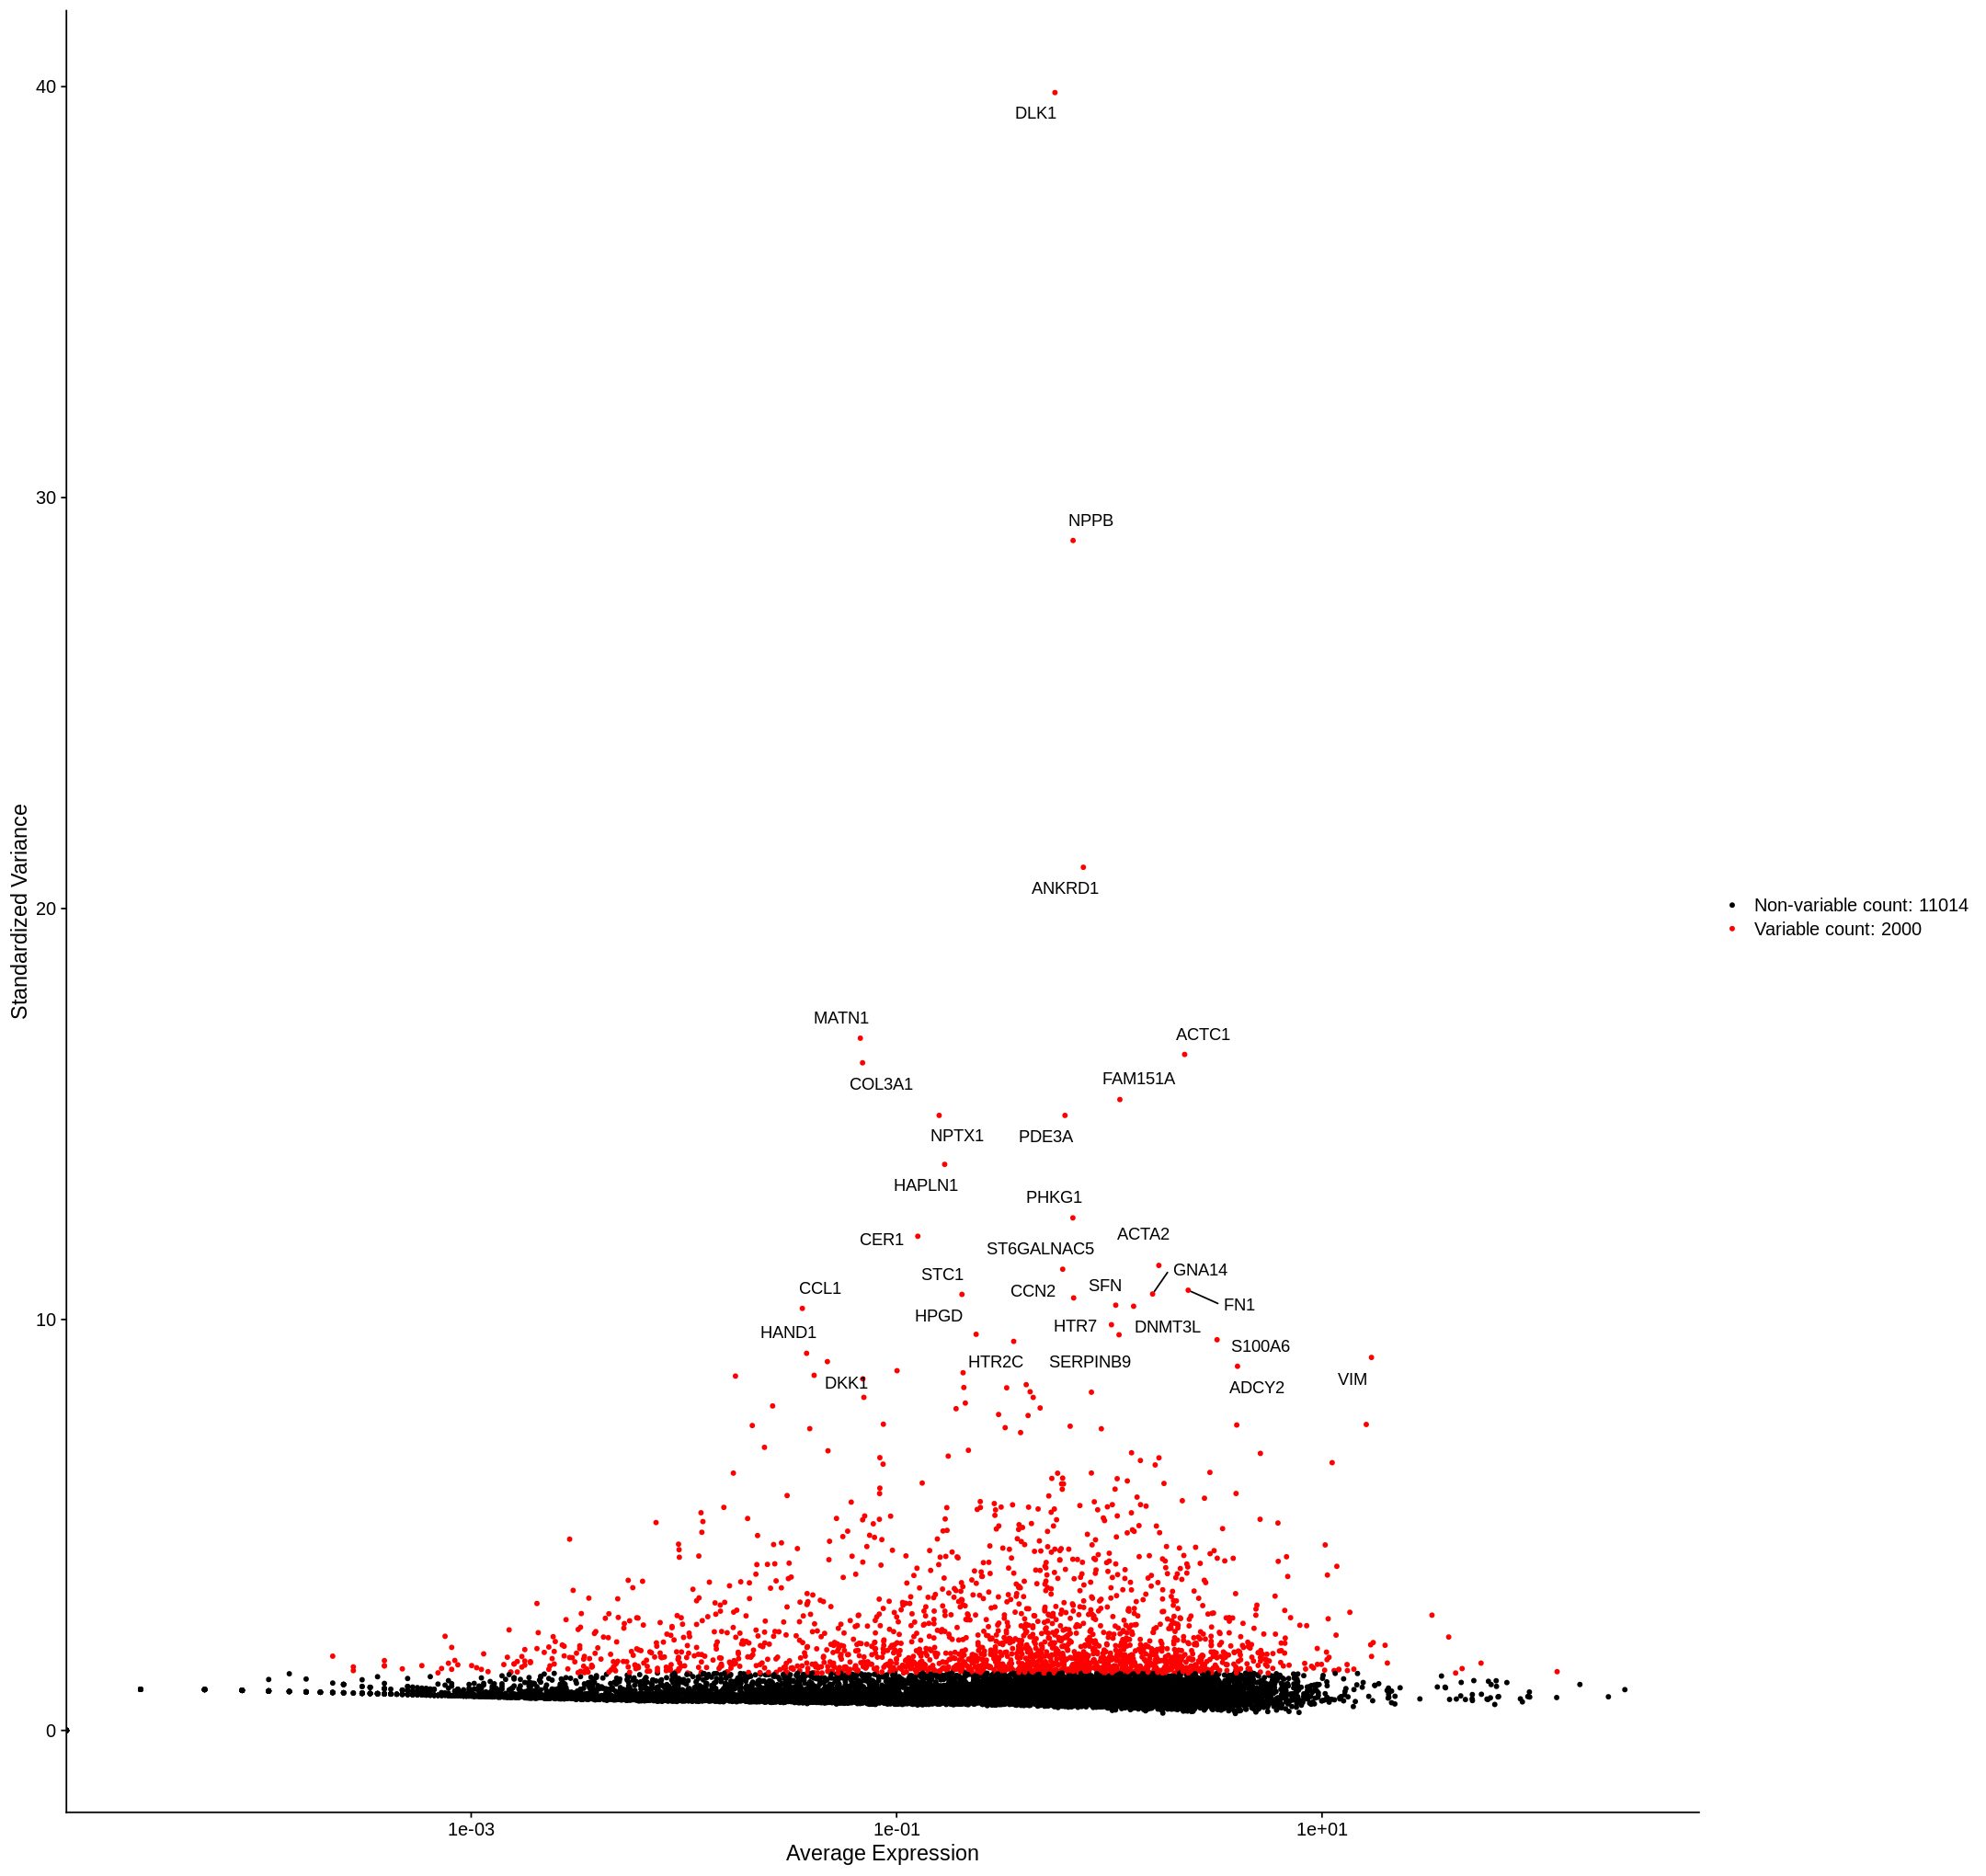

In [86]:
topfeature <- head(VariableFeatures(embryo.integrated), 30)
plotfeature <- VariableFeaturePlot(embryo.integrated)
LabelPoints(plot = plotfeature, points = topfeature, repel = TRUE, xnudge = 0, ynudge = 0, max.overlaps = 30)

# Visualization fo the different principal composant

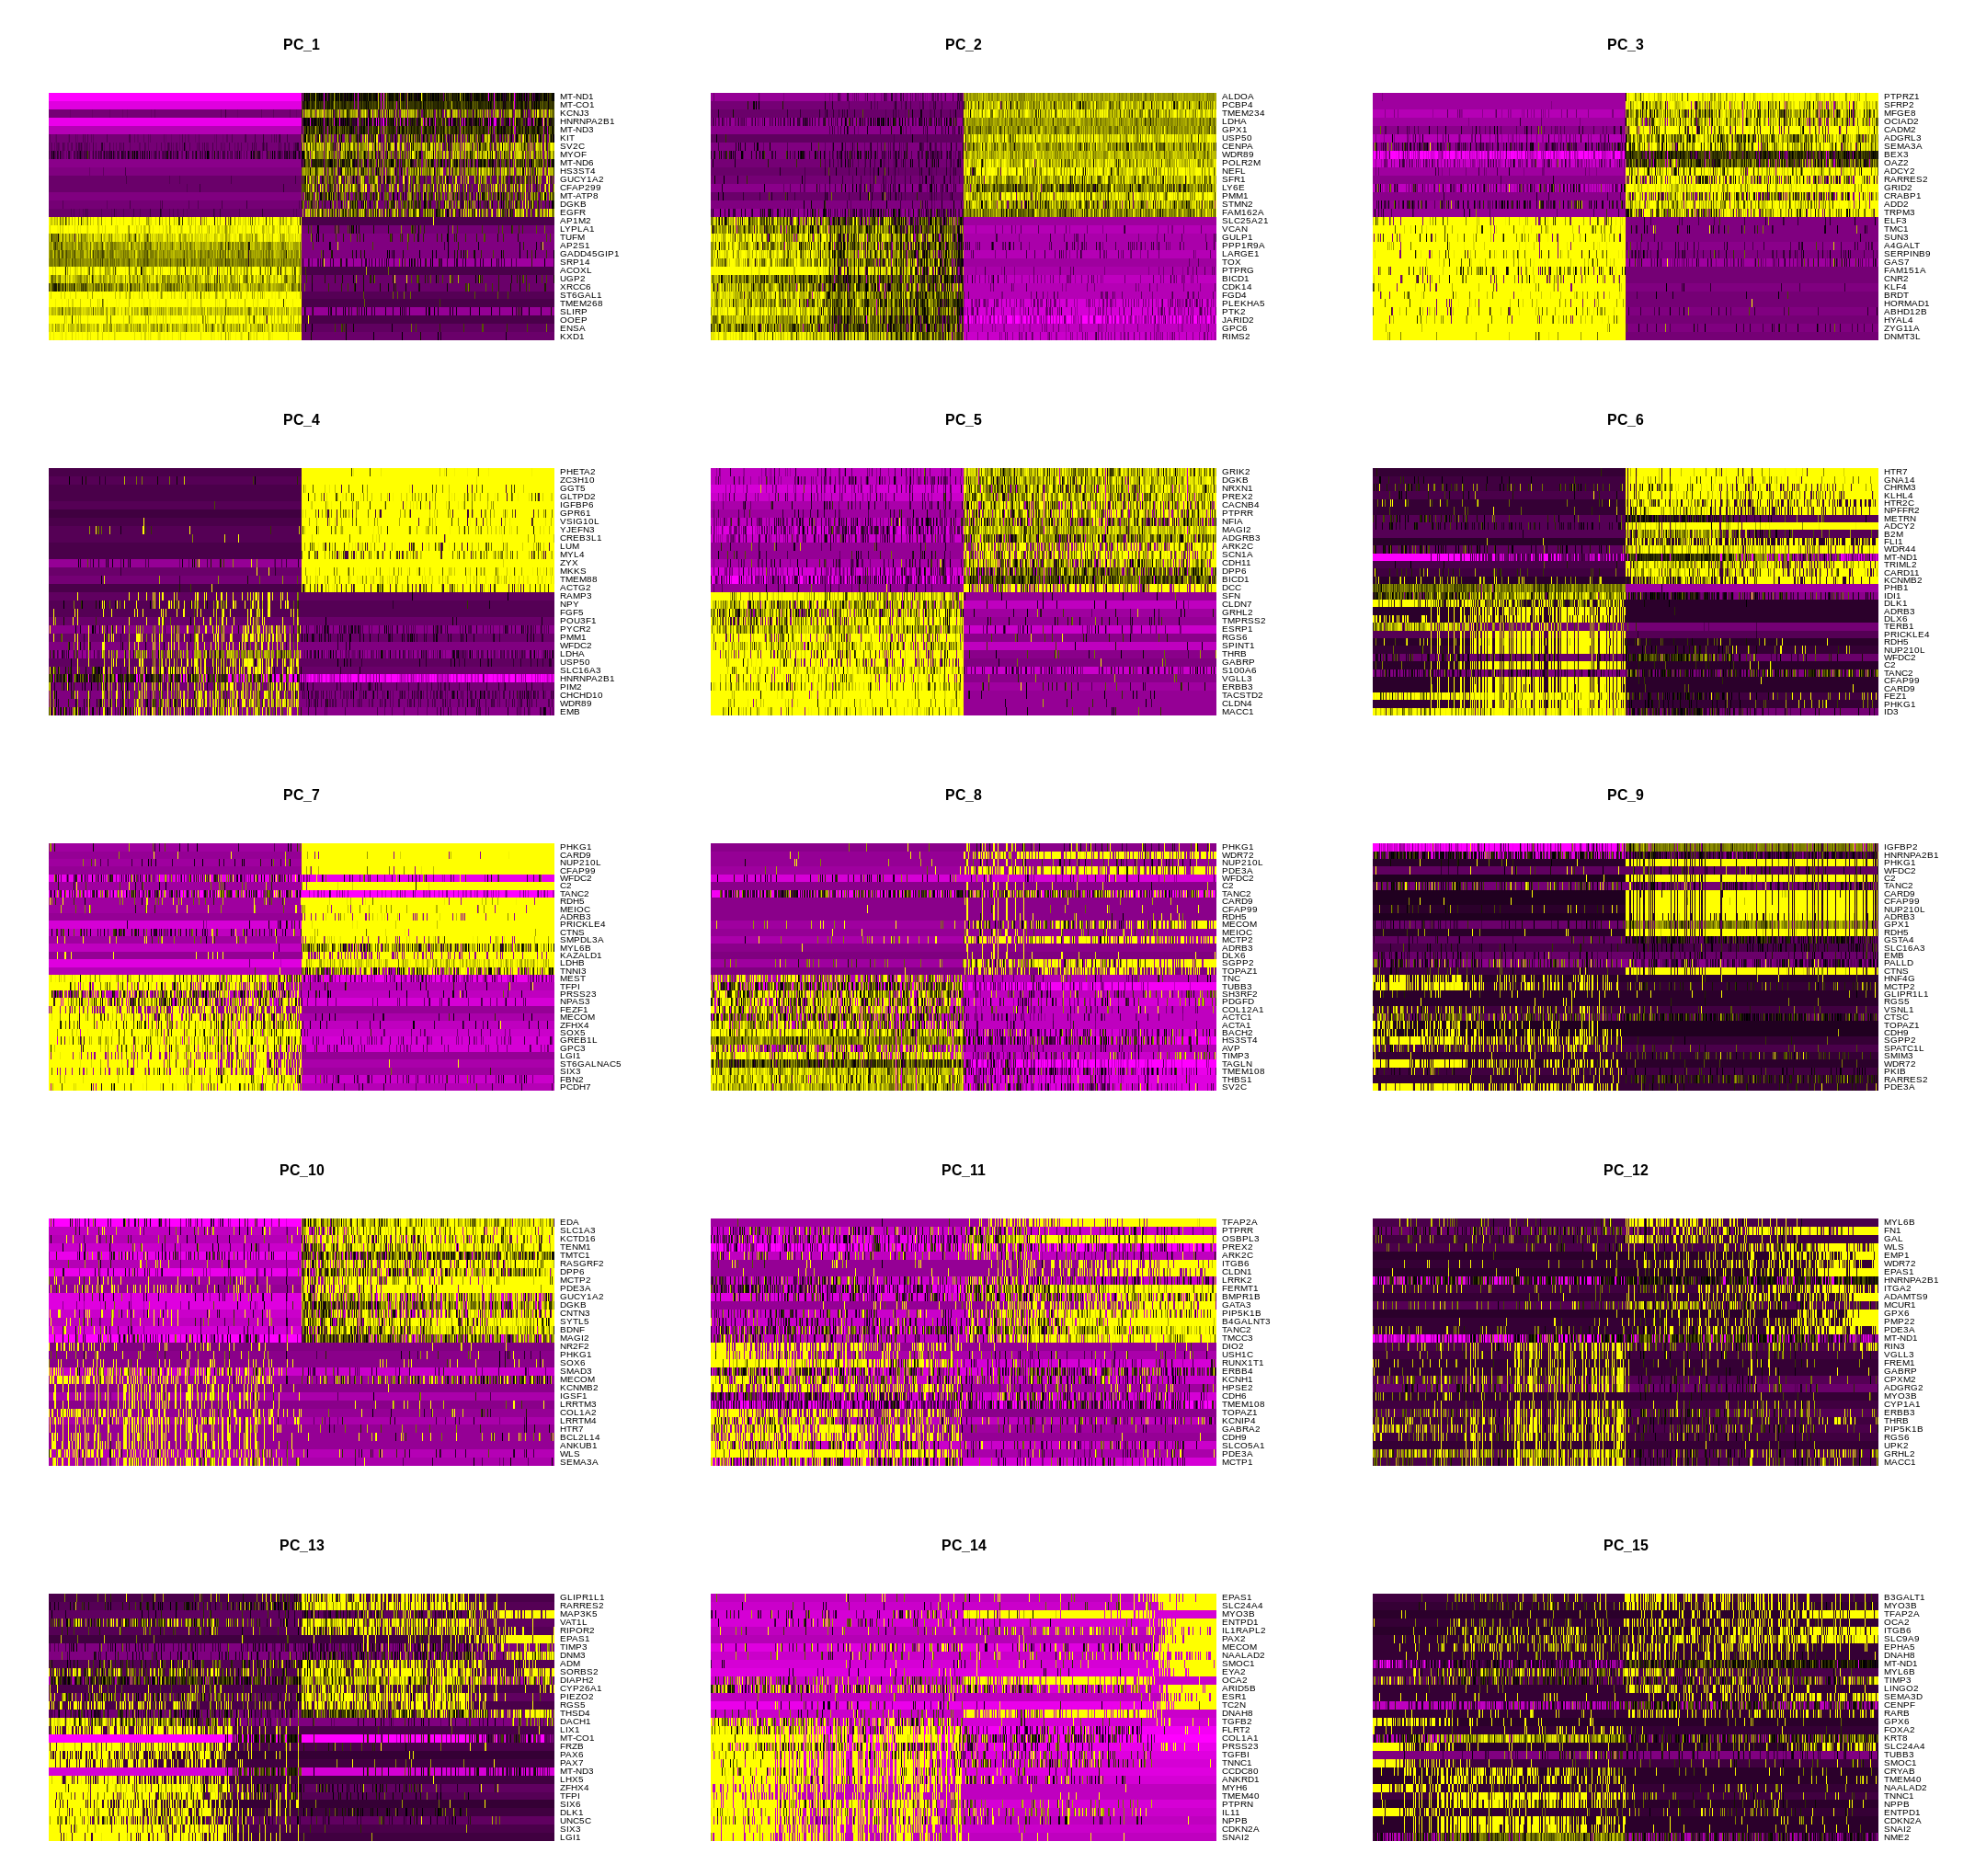

In [88]:
DimHeatmap(embryo.integrated, dims = 1:15, cells = 1000, balanced = TRUE)

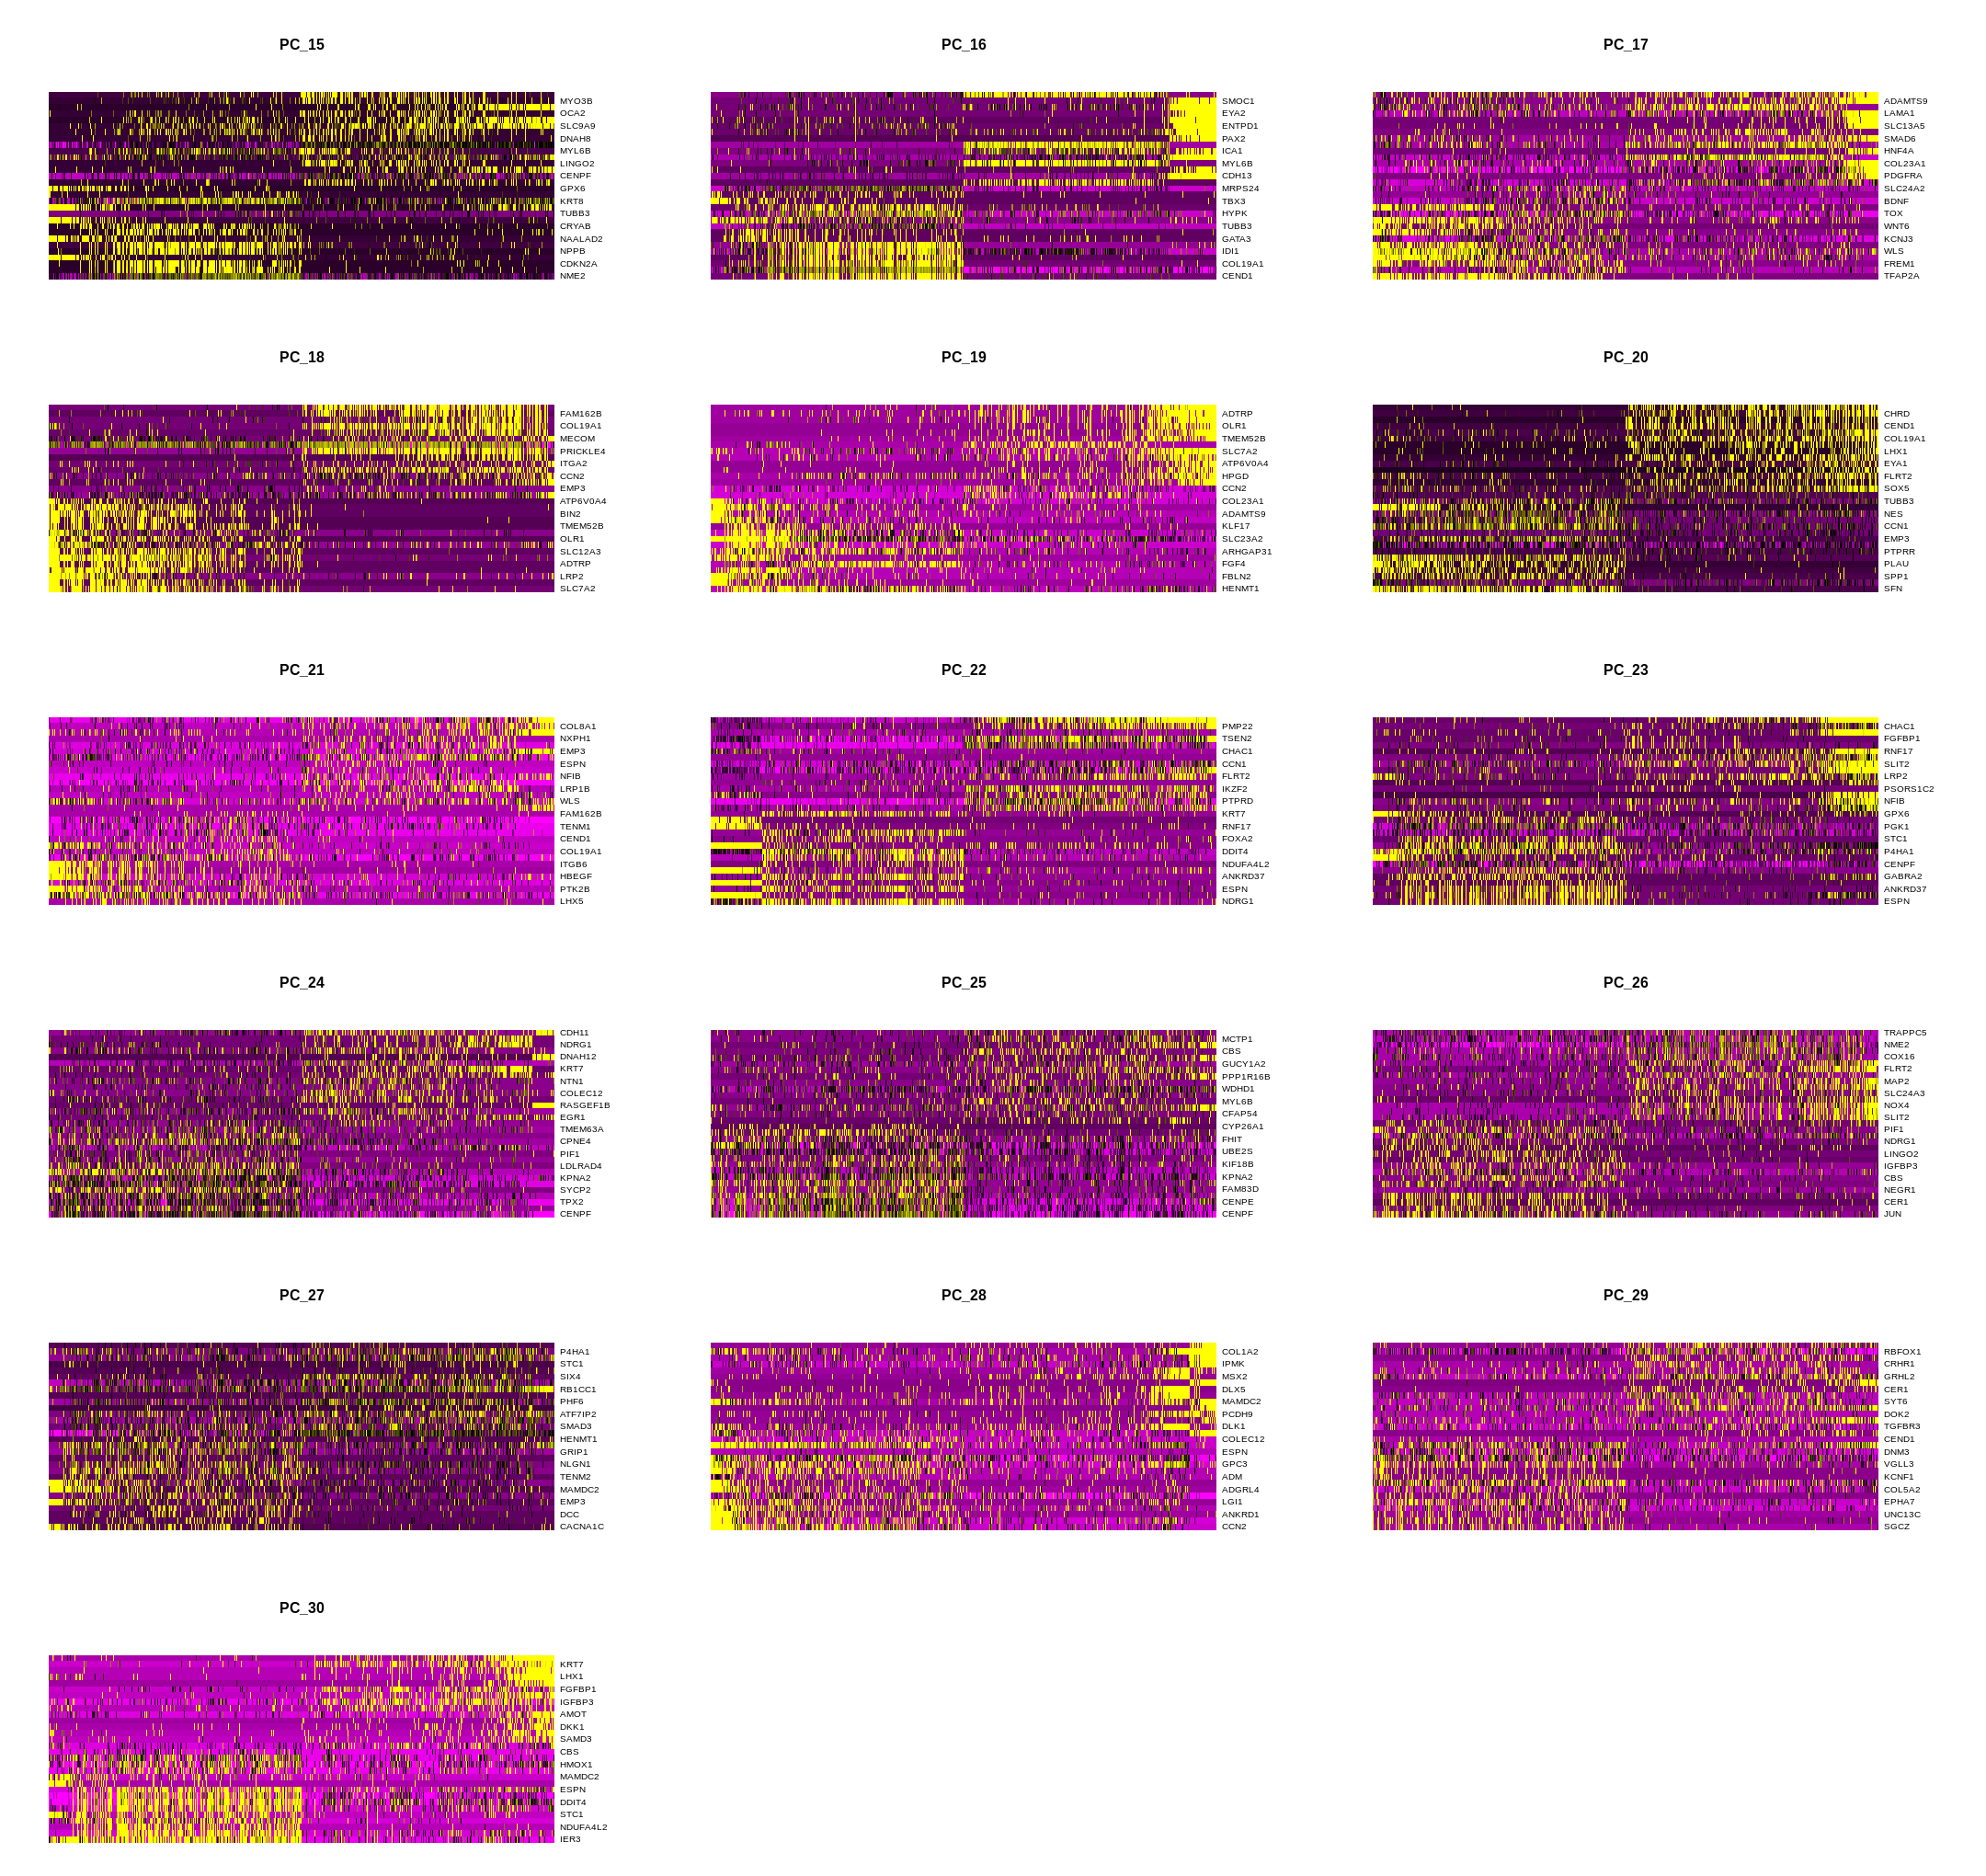

In [89]:
DimHeatmap(embryo.integrated, dims = 15:30, cells = 1000, balanced = TRUE)

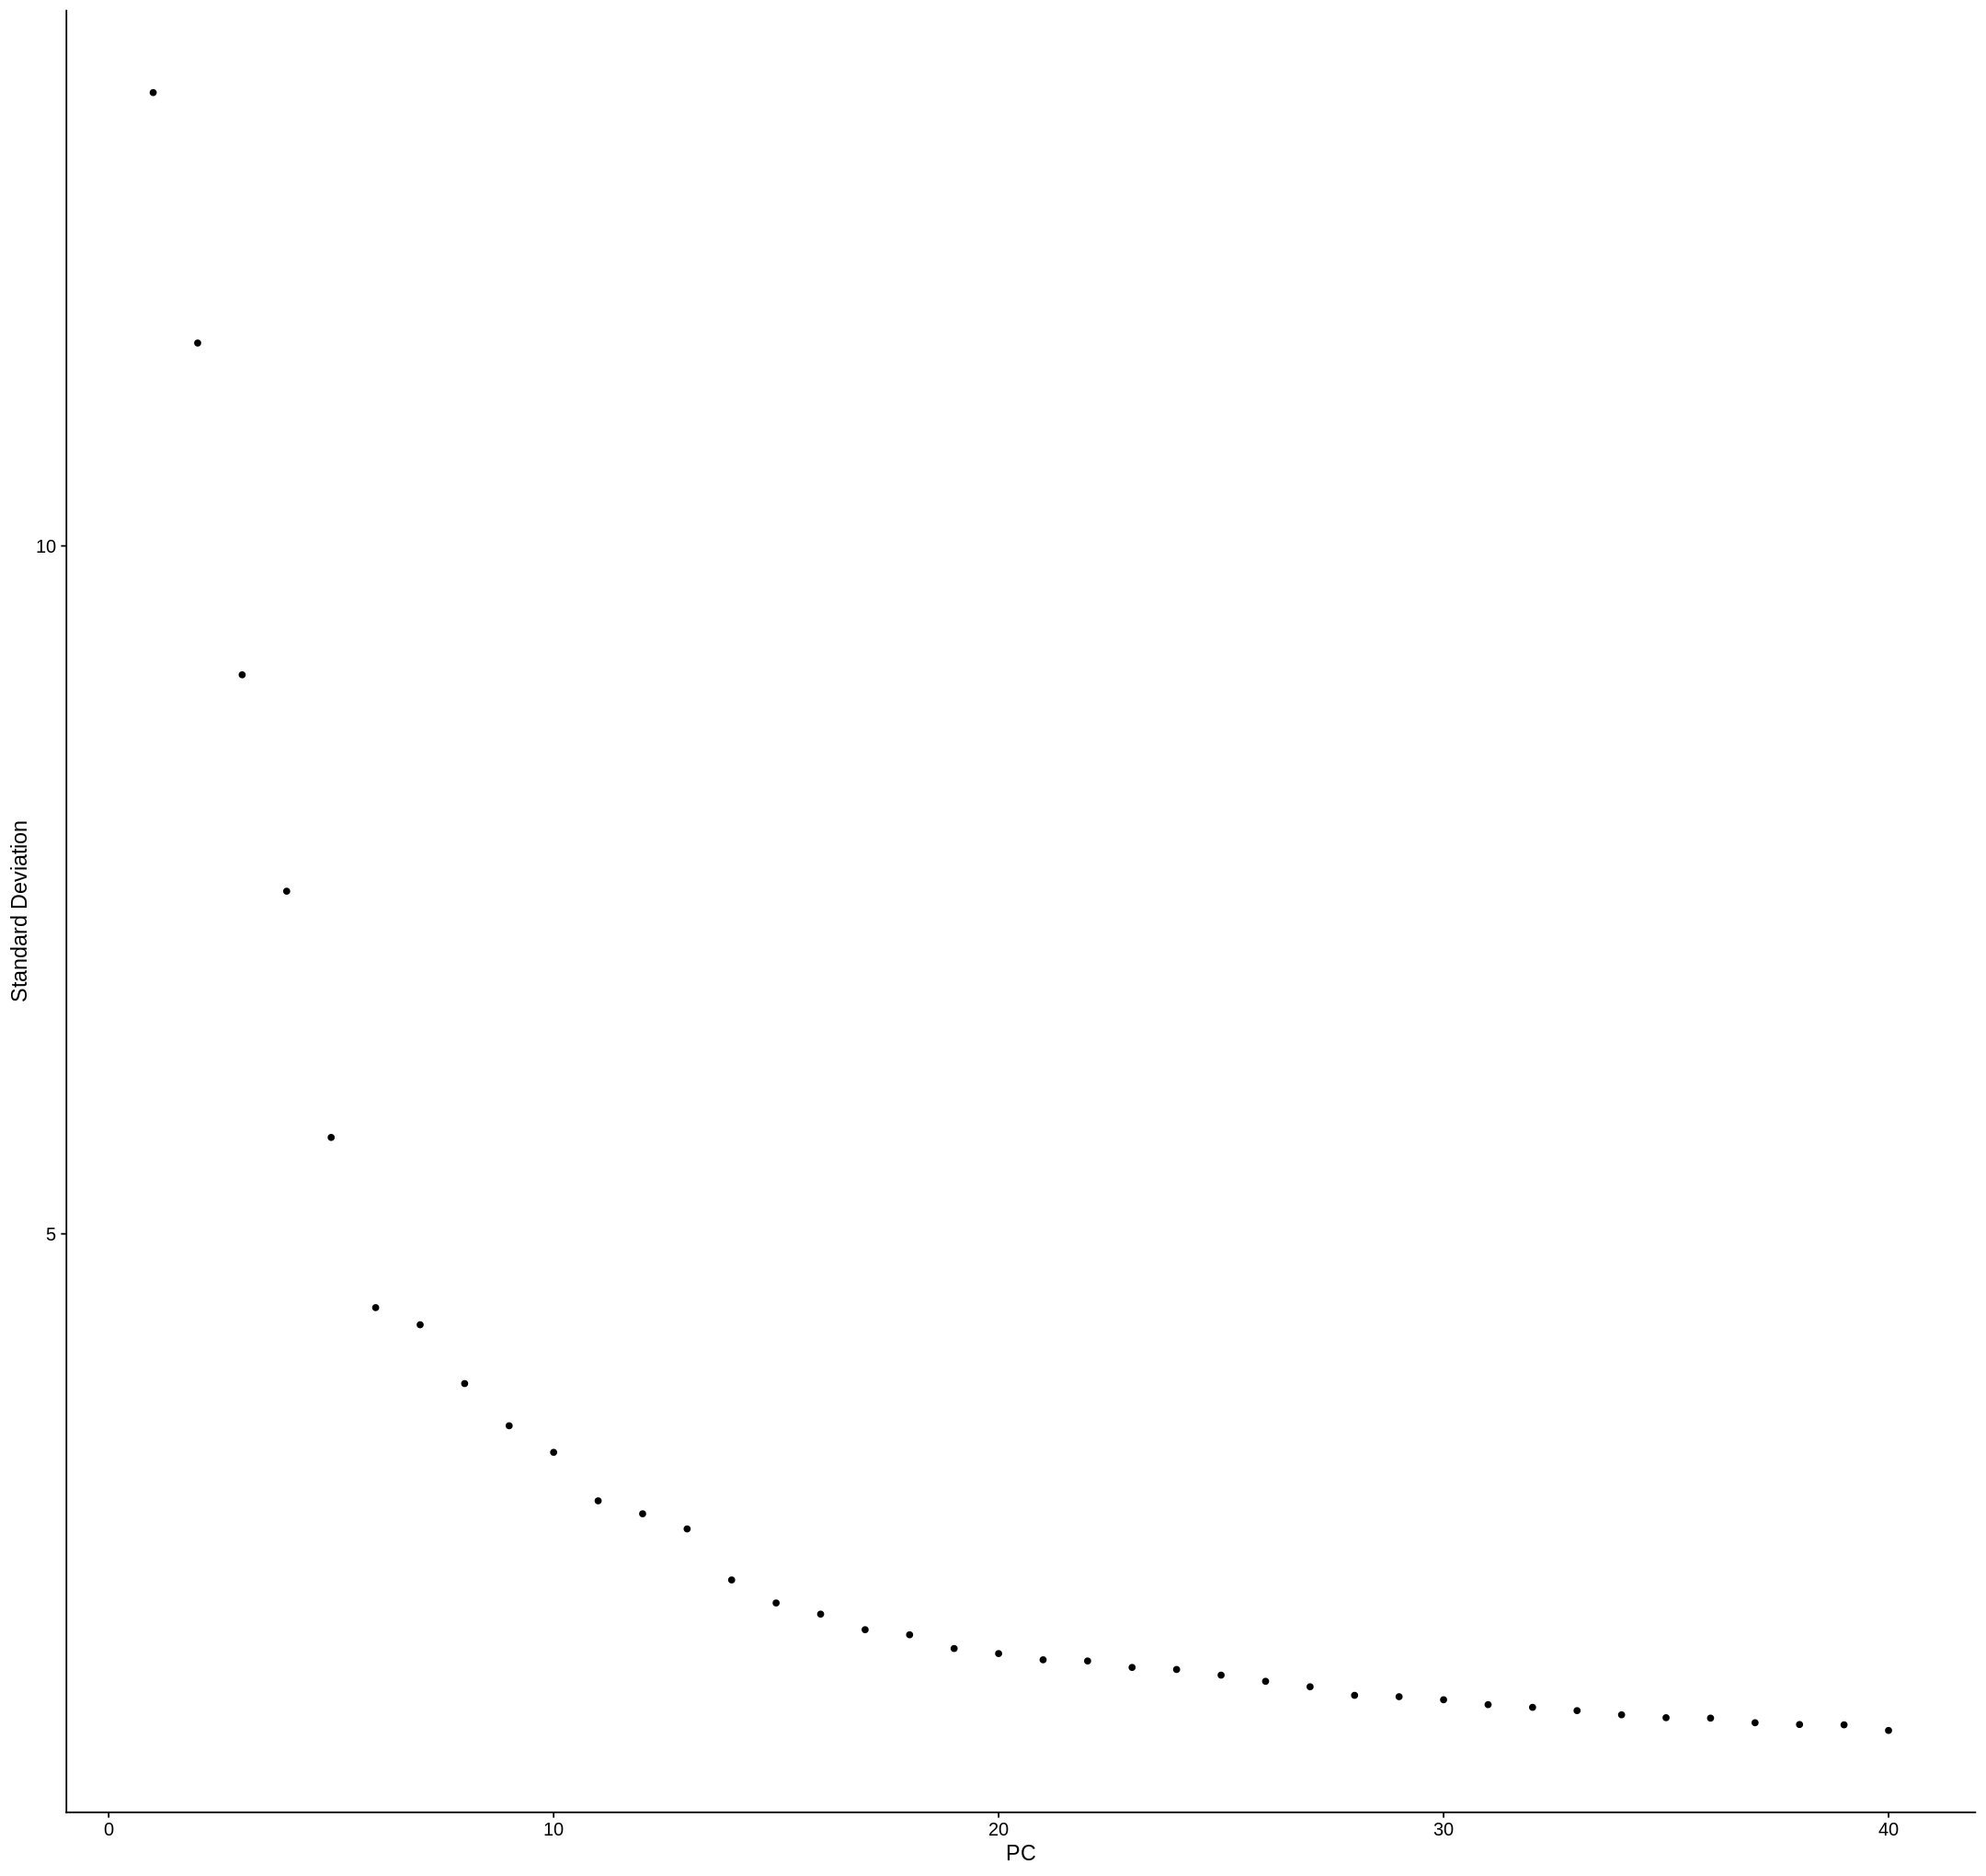

In [90]:
ElbowPlot(embryo.integrated, ndims = 40)

# Vizualization and clustering

In [91]:
embryo.integrated <- RunUMAP(embryo.integrated, dims = 1:20)

14:40:00 UMAP embedding parameters a = 0.9922 b = 1.112

14:40:00 Read 35819 rows and found 20 numeric columns

14:40:00 Using Annoy for neighbor search, n_neighbors = 30

14:40:00 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:40:03 Writing NN index file to temp file /tmp/RtmpTHEdXS/file3c1b4e6cd69534

14:40:03 Searching Annoy index using 1 thread, search_k = 3000

14:40:14 Annoy recall = 100%

14:40:16 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:40:19 Initializing from normalized Laplacian + noise (using irlba)

14:40:39 Commencing optimization for 200 epochs, with 1559180 positive edges

14:41:05 Optimization finished



In [92]:
embryo.integrated <- FindNeighbors(embryo.integrated, dims = 1:20)

Computing nearest neighbor graph

Computing SNN



In [93]:
embryo.integrated <- FindClusters(embryo.integrated, resolution = 0.1)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 35819
Number of edges: 1258799

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9836
Number of communities: 15
Elapsed time: 6 seconds


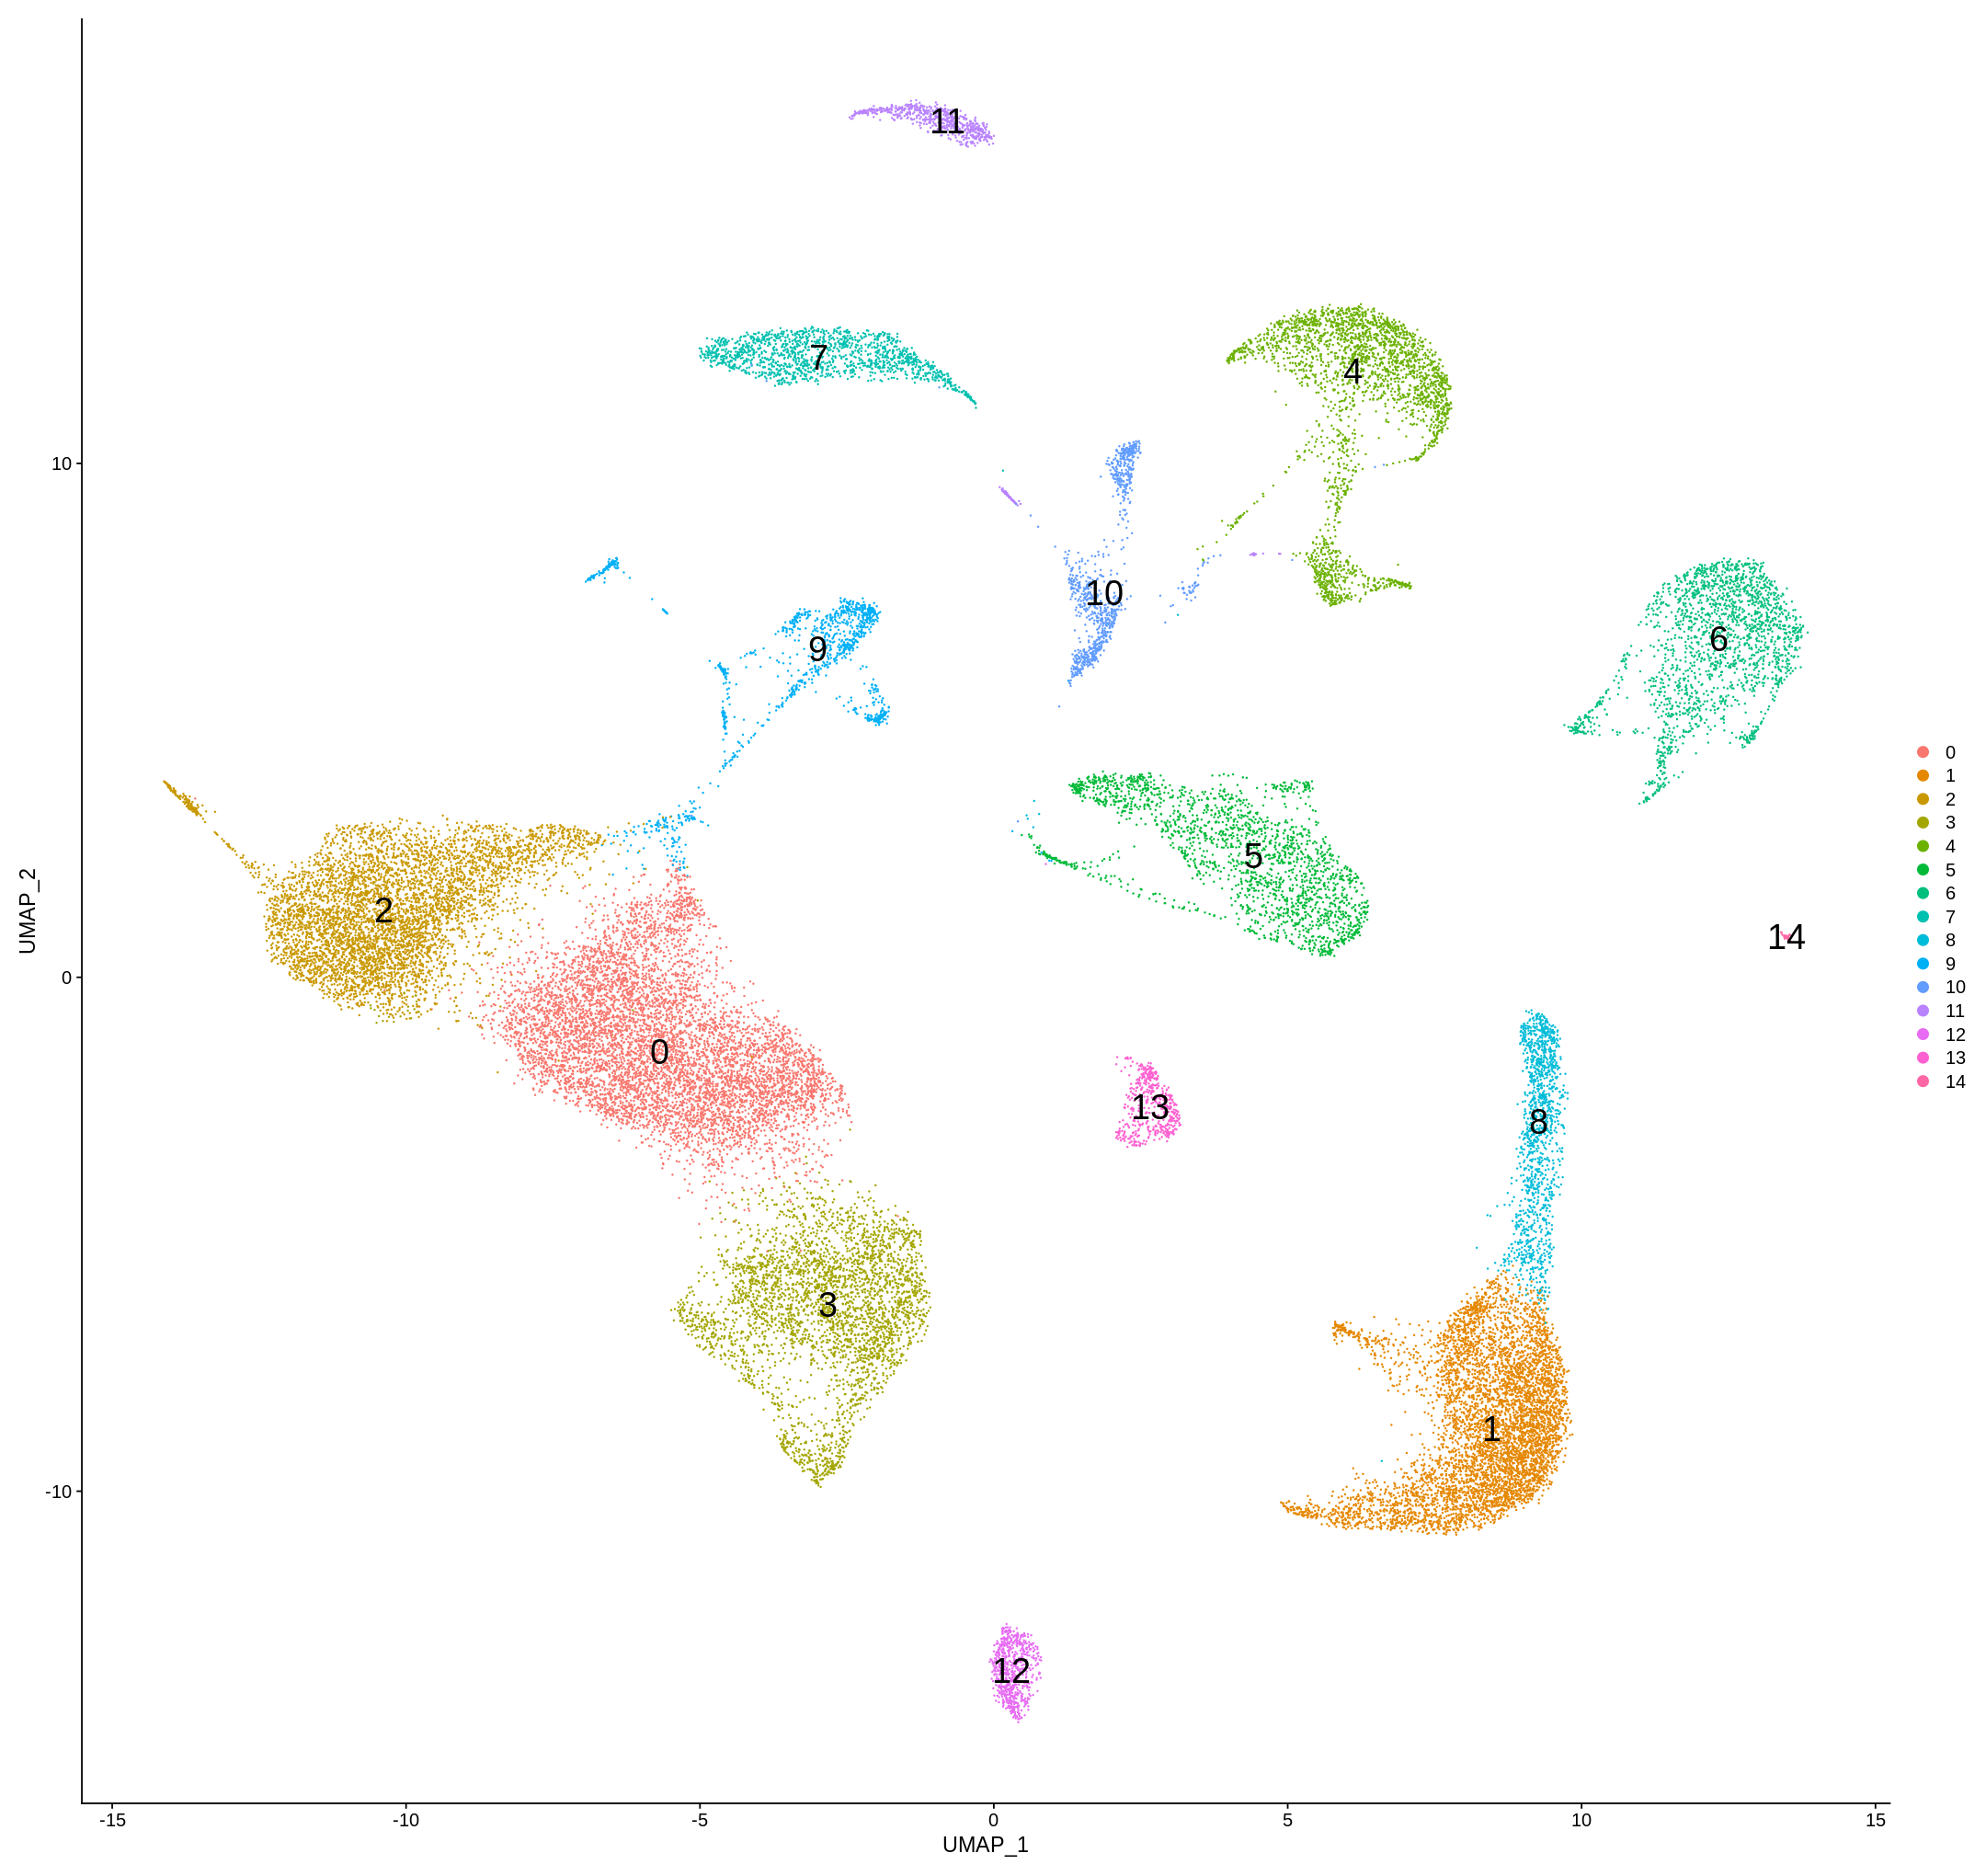

In [94]:
DimPlot(embryo.integrated, reduction = "umap", label = TRUE, label.size = 8)

In [95]:
Idents(embryo.integrated) <- "species"

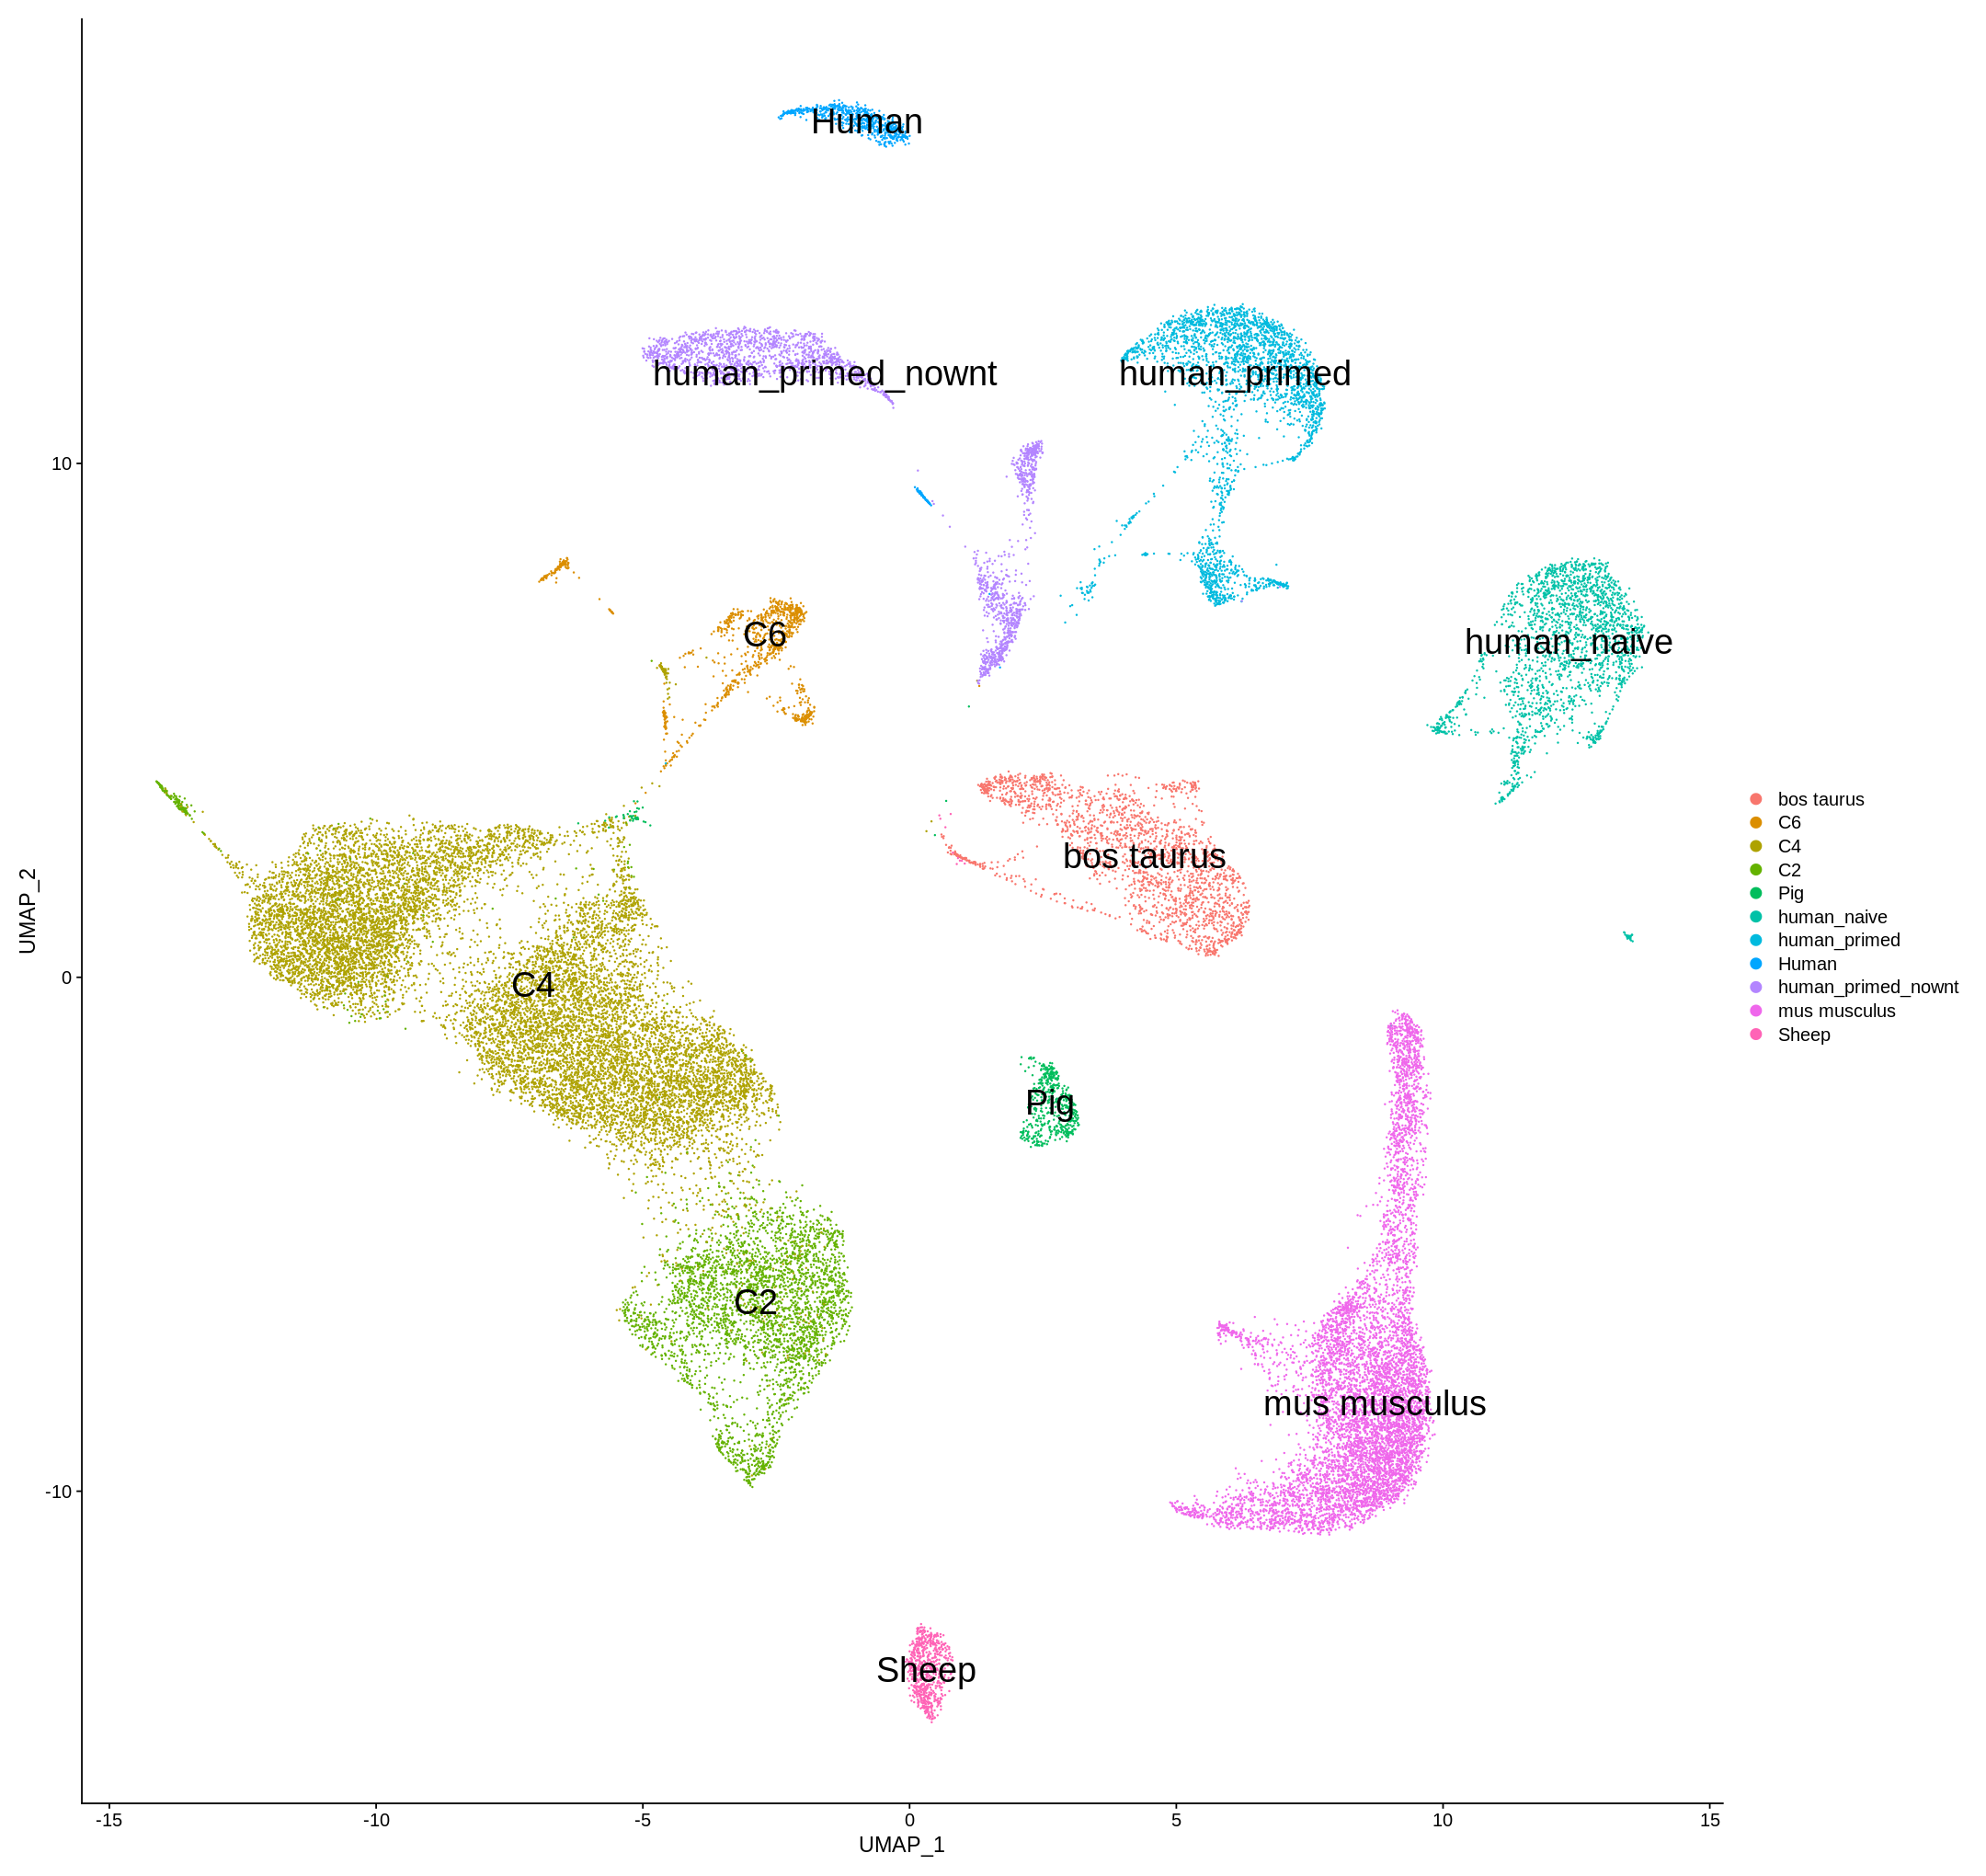

In [96]:
DimPlot(embryo.integrated, reduction = "umap", label = TRUE, label.size = 8)

In [97]:
saveRDS(embryo.integrated, "/home/adufour/work/rds_storage/omics/stemcell_multi_species_obj_v3.rds")